In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from warnings import filterwarnings 
filterwarnings ('ignore')
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize']=(20,10)
pd.set_option('display.max_columns',None)

In [28]:
df = pd.read_csv('C:/Users/pilot/Downloads/Paper1/bank.csv',sep = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [31]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [32]:
df_num = df.select_dtypes(['int64','float64'])
df_num

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


age


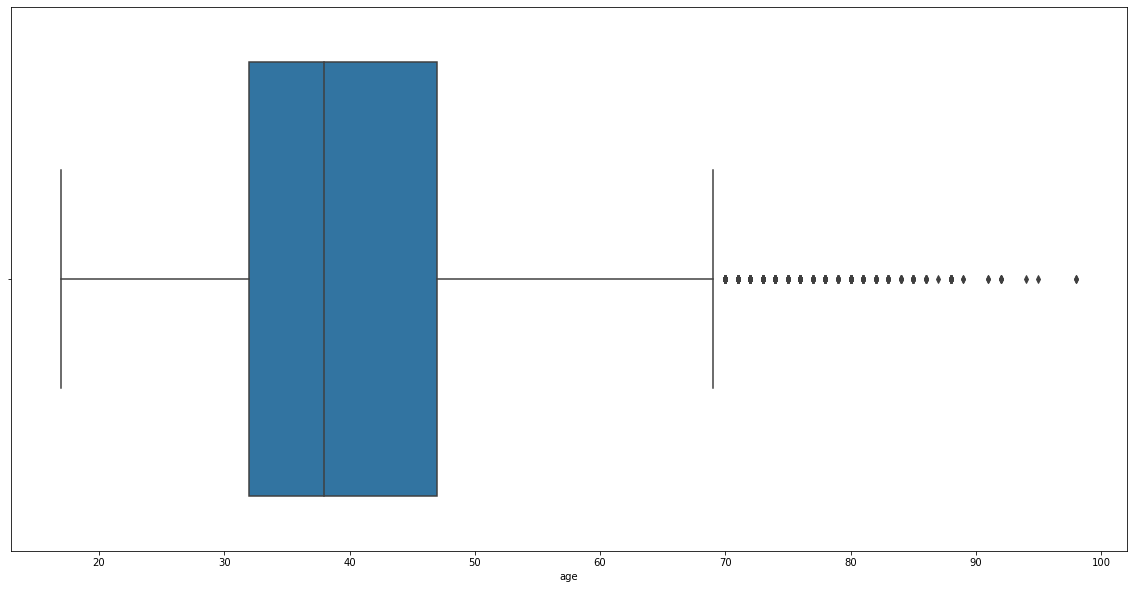

duration


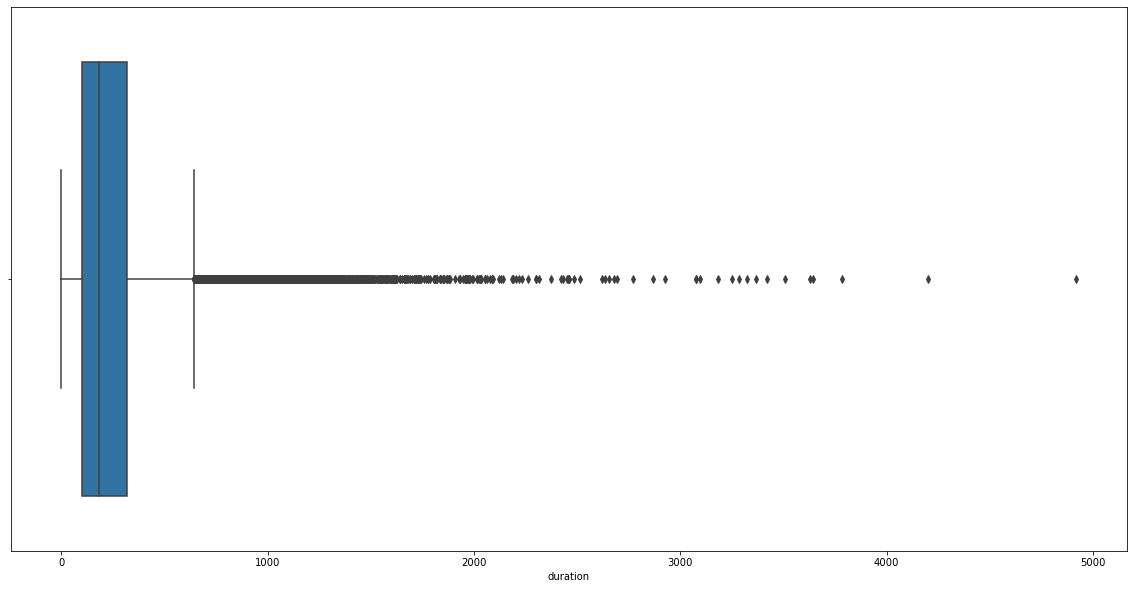

campaign


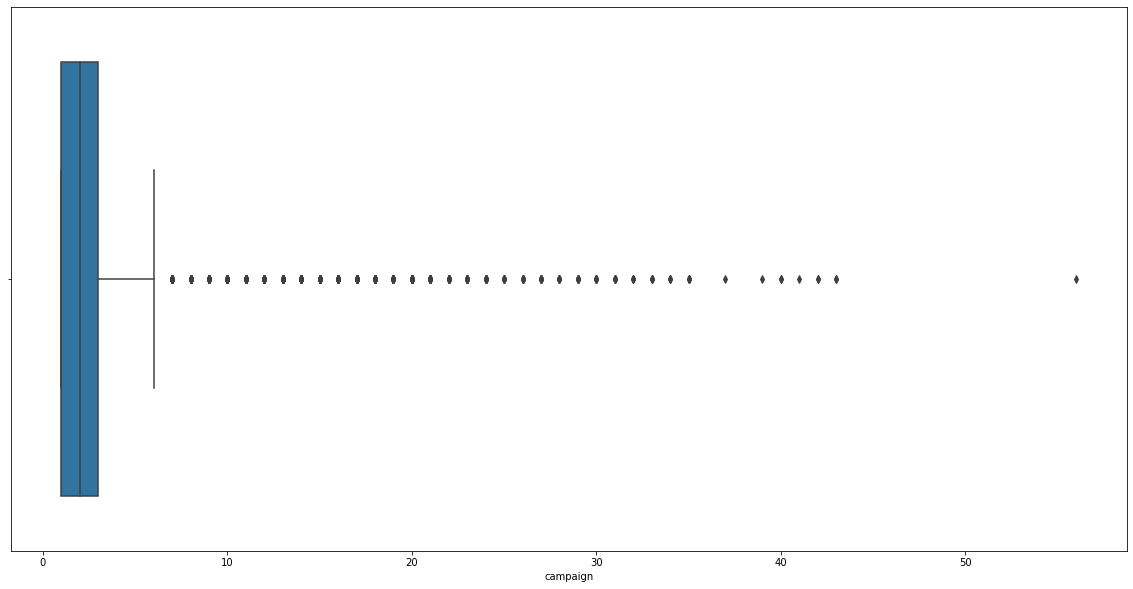

pdays


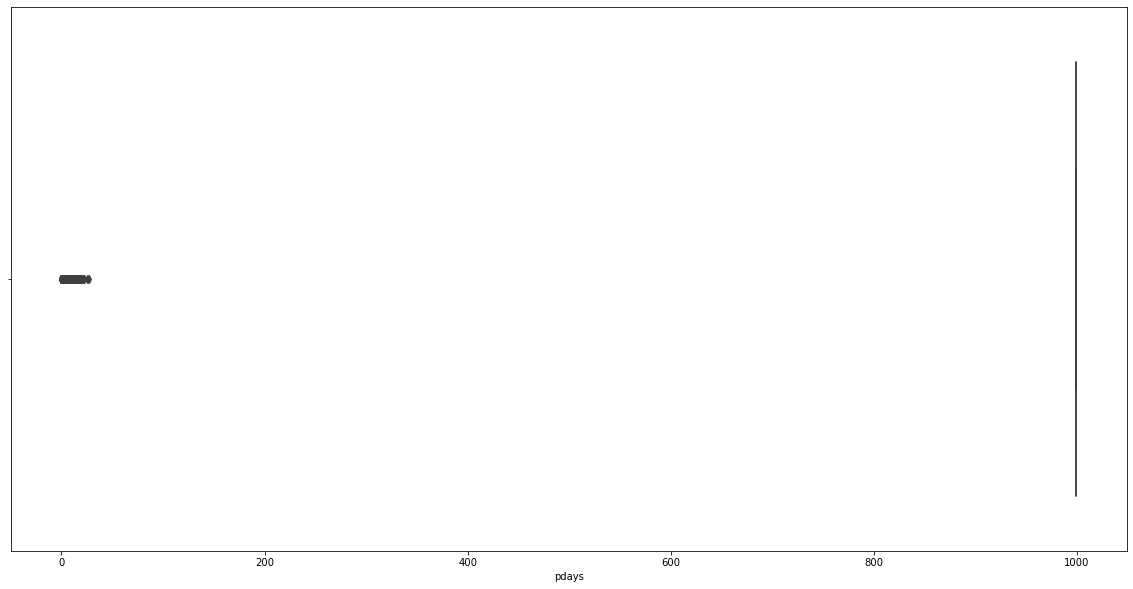

previous


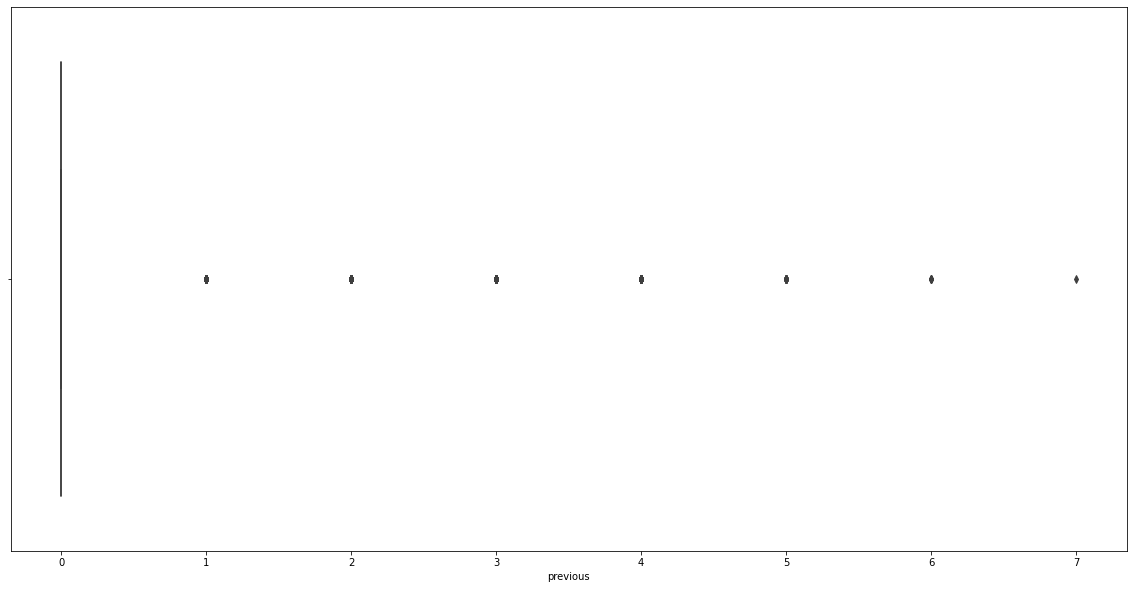

emp.var.rate


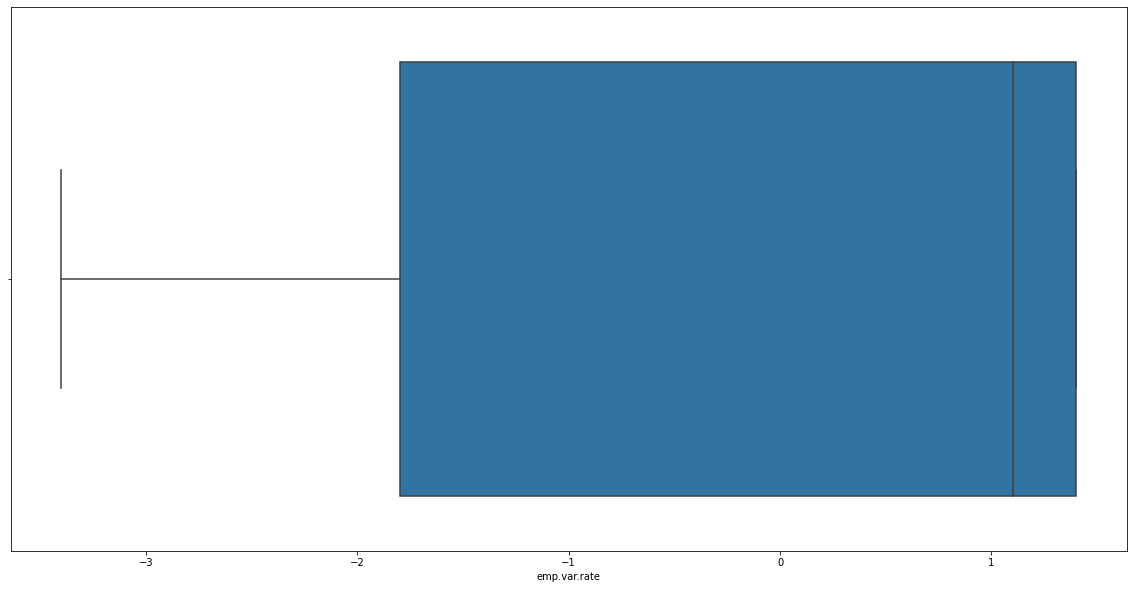

cons.price.idx


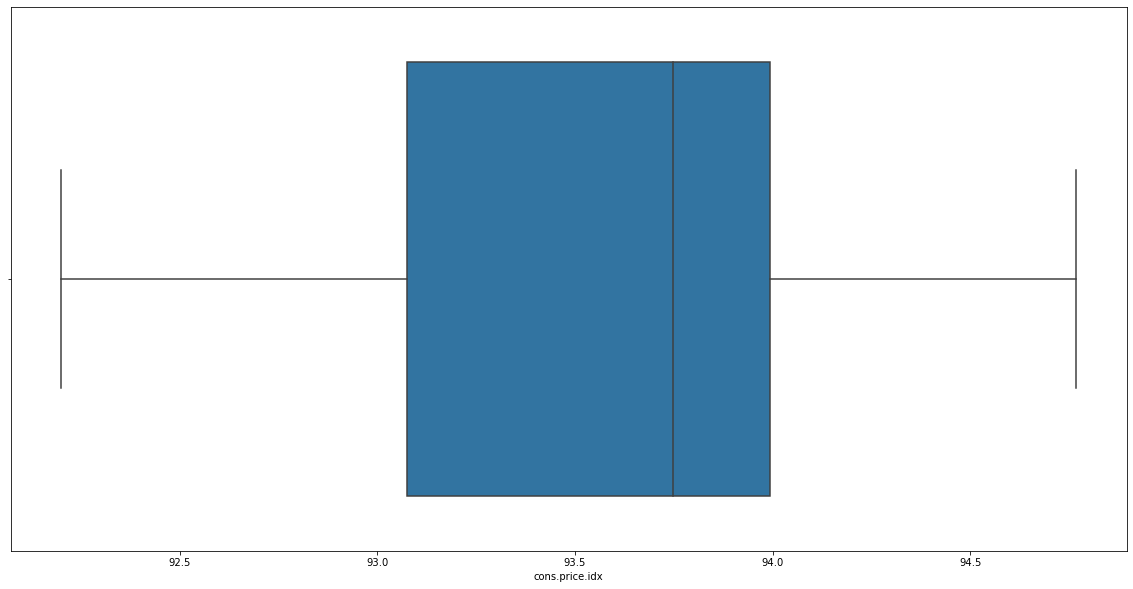

cons.conf.idx


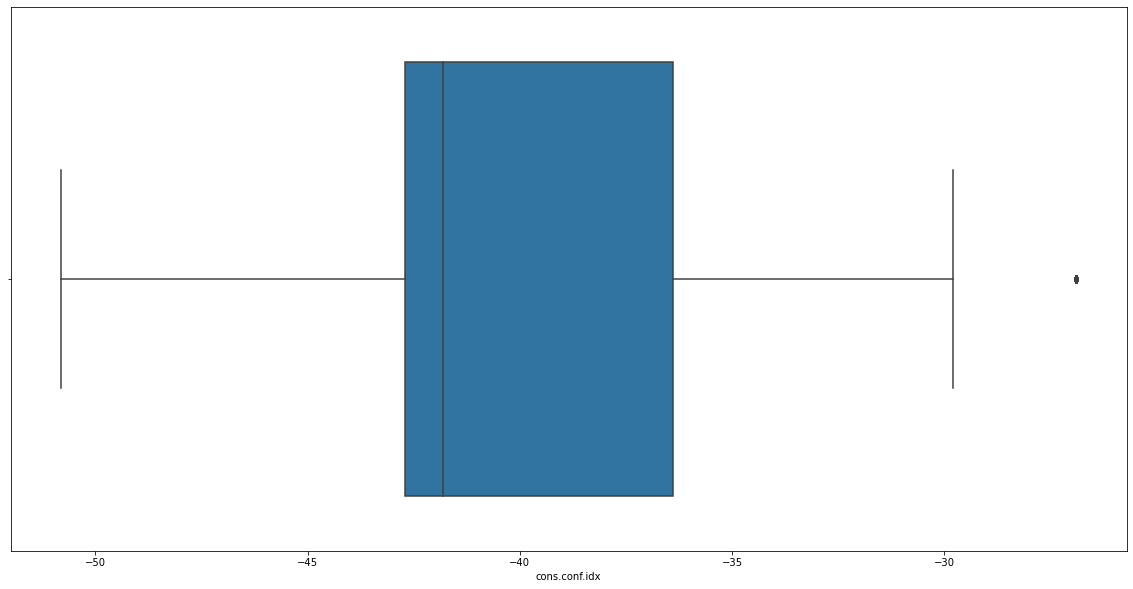

euribor3m


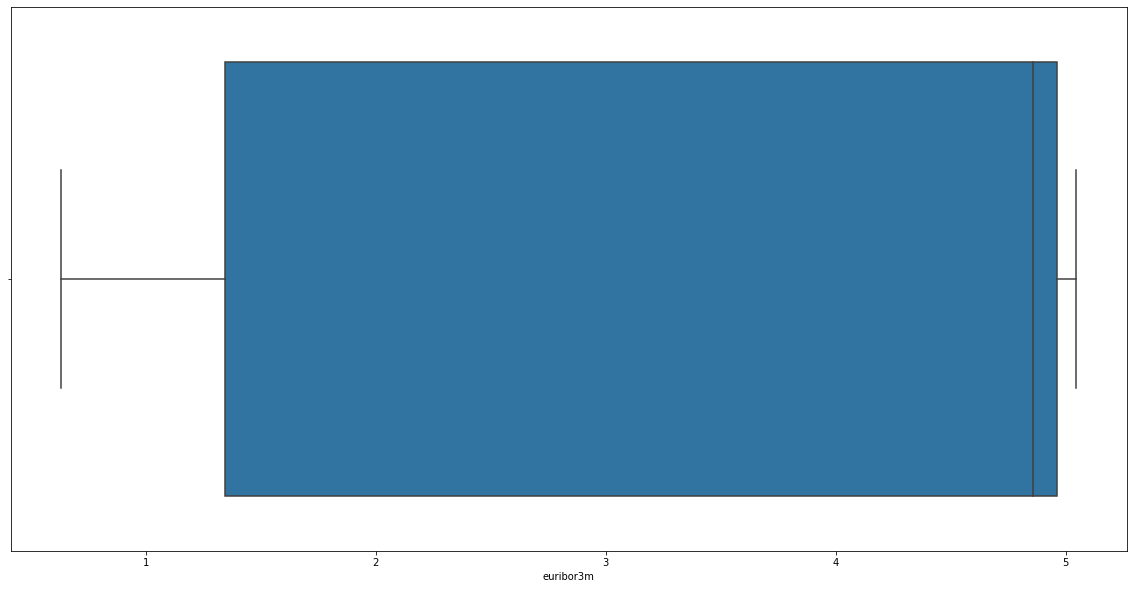

nr.employed


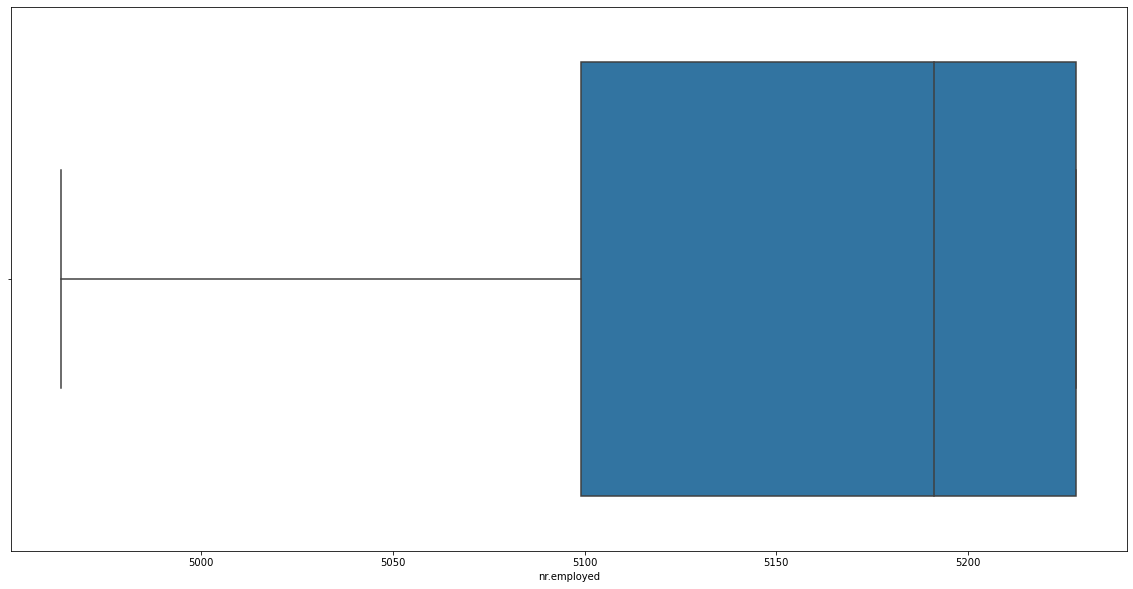

In [33]:
for i in df_num:
    print(i)
    sns.boxplot(df[i])
    plt.show()

In [34]:
bi = [10,20,30,40,50,60,70,80,90,100]
label = ['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
df['Age'] = pd.cut(x=df.age,bins=bi,labels=label)
df.Age

0        50-60
1        50-60
2        30-40
3        30-40
4        50-60
         ...  
41183    70-80
41184    40-50
41185    50-60
41186    40-50
41187    70-80
Name: Age, Length: 41188, dtype: category
Categories (9, object): ['10-20' < '20-30' < '30-40' < '40-50' ... '60-70' < '70-80' < '80-90' < '90-100']

In [35]:
df.duration

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

In [36]:
df.duration.isna().sum()

0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  object  
 3   education       41188 non-null  object  
 4   default         41188 non-null  object  
 5   housing         41188 non-null  object  
 6   loan            41188 non-null  object  
 7   contact         41188 non-null  object  
 8   month           41188 non-null  object  
 9   day_of_week     41188 non-null  object  
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  object  
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [38]:
l=[10,11]
def Outlier(df):
    for column in df.iloc[:,l].columns:
        if df[column].dtype!='str':
            Q1=df[column].quantile(0.25)
            Q3=df[column].quantile(0.75)
            IQR= Q3-Q1
            lower=Q1-(1.5* IQR)
            upper=Q3+(1.5* IQR)
            df.loc[:,column] =np.where(df[column].values>upper,upper,df[column].values)
            df.loc[:,column] =np.where(df[column].values<lower,lower,df[column].values)
    return df
 
df2=Outlier(df)
print(df2.columns)
print(df2.head())

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'Age'],
      dtype='object')
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon     261.0       1.0    999         0  nonexistent   
1   may         mon     149.0       1.0    999         0  nonexistent   
2   may         mon   

In [39]:
df.drop(['age'],axis=1,inplace=True)

In [40]:
df_num2 = df.select_dtypes(['int64','float64'])

duration


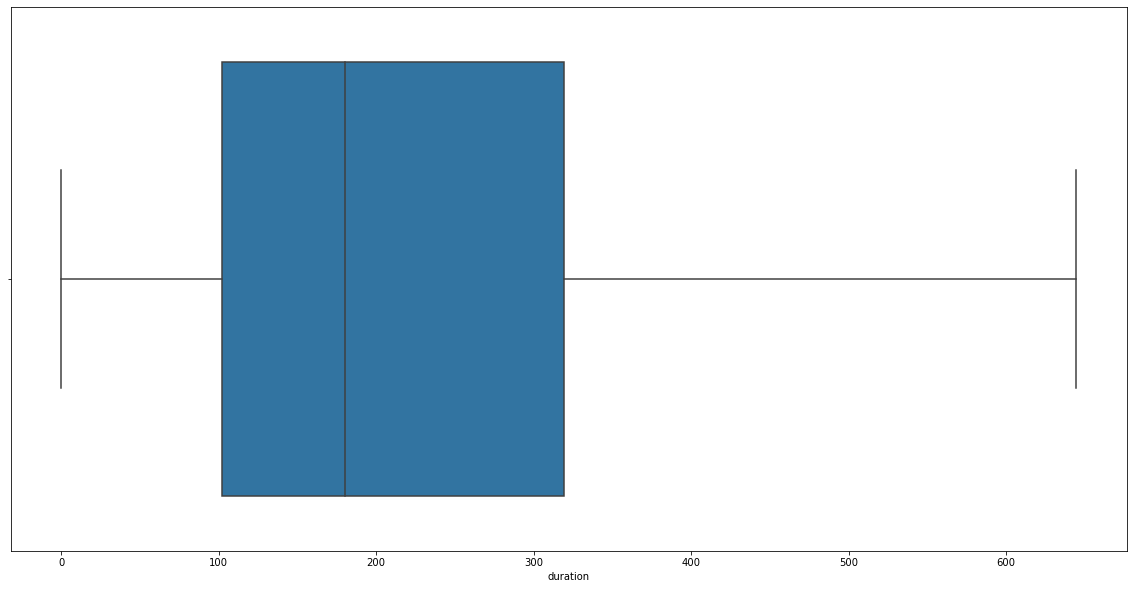

campaign


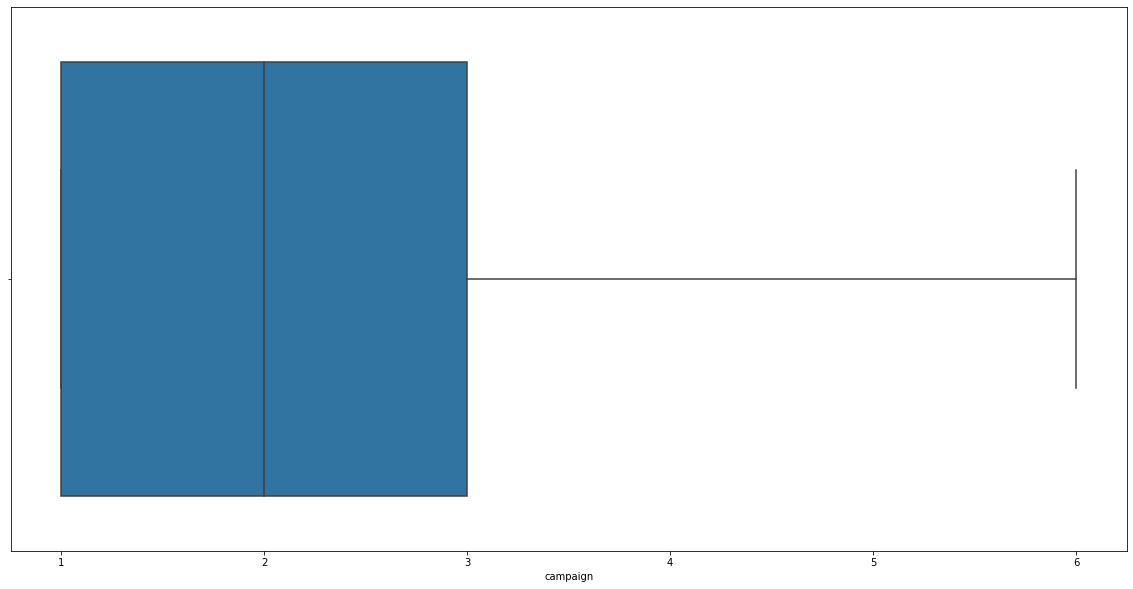

pdays


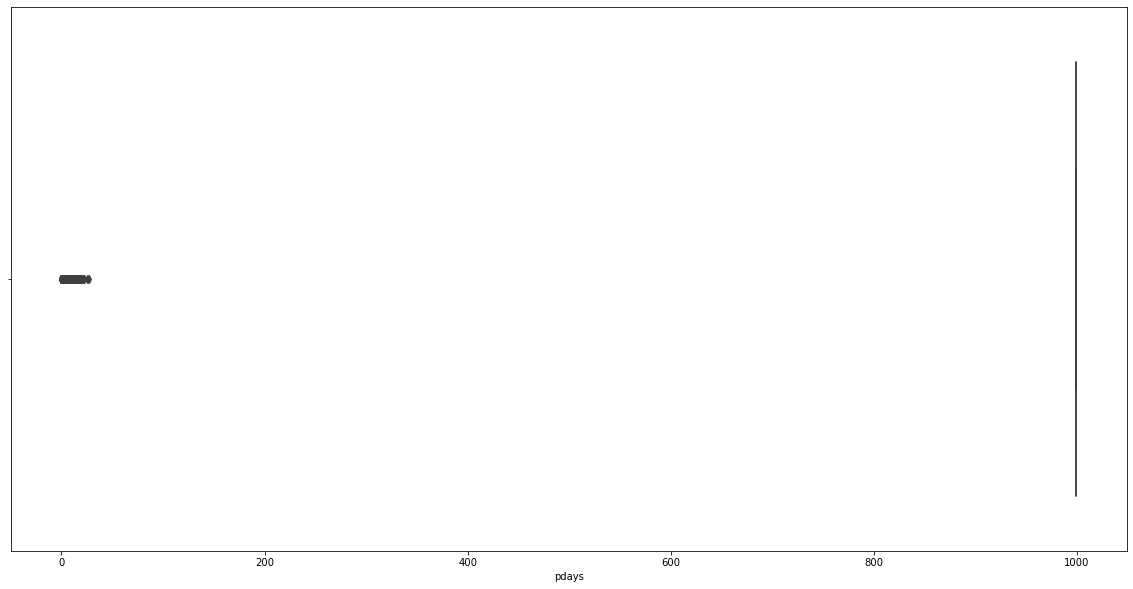

previous


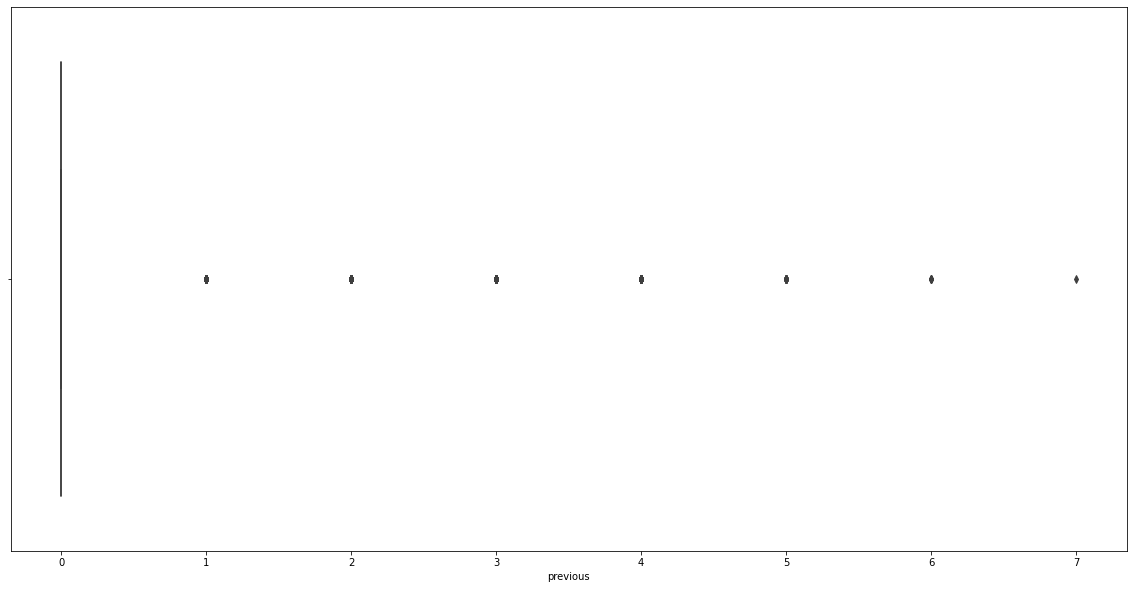

emp.var.rate


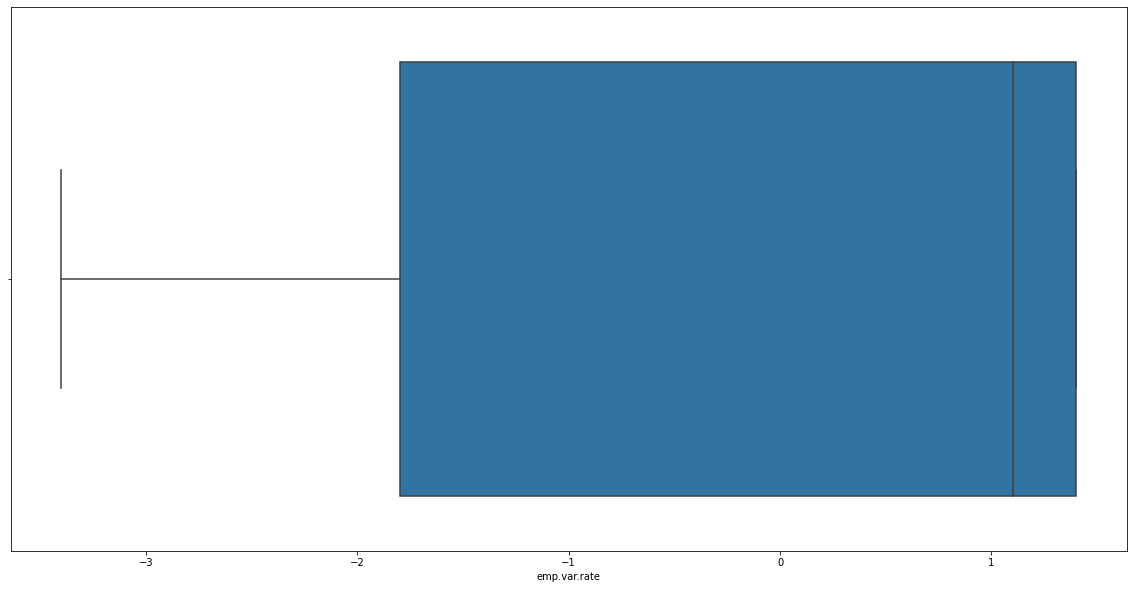

cons.price.idx


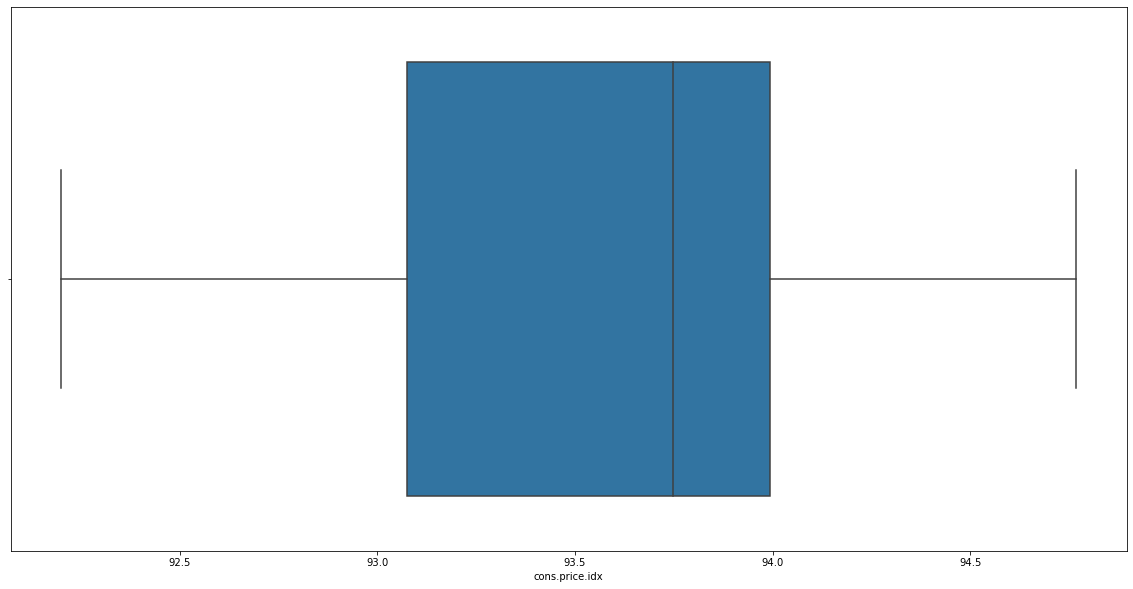

cons.conf.idx


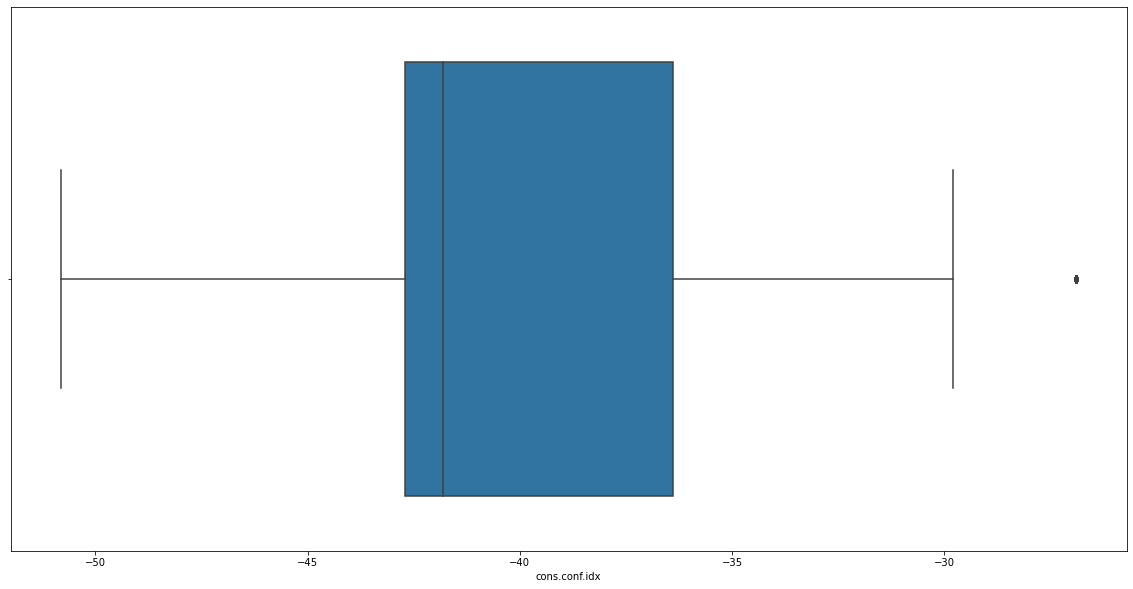

euribor3m


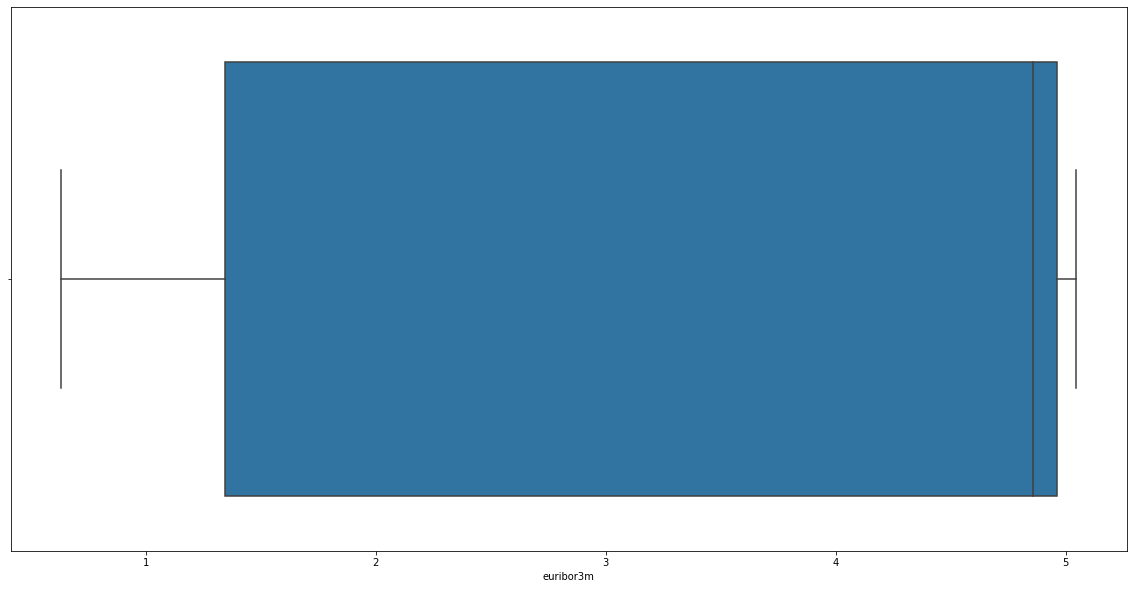

nr.employed


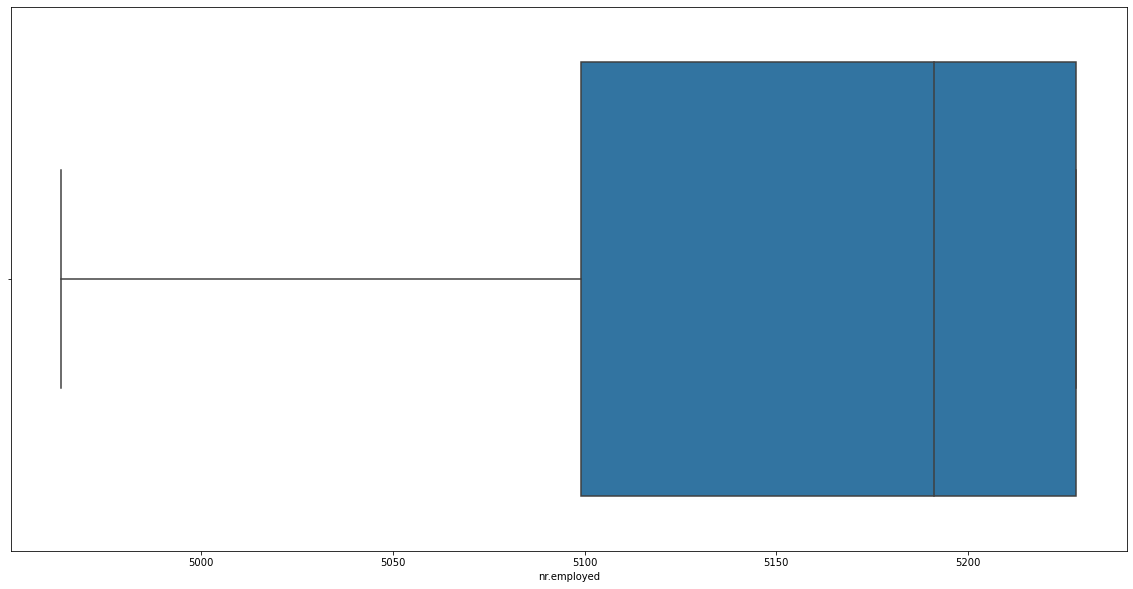

In [41]:
for i in df_num2.columns:
    print(i)
    sns.boxplot(df[i])
    plt.show()

# Outliers have been taken care off!

# Q1. What does the primary analysis of several categorical features reveal?

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             41188 non-null  object  
 1   marital         41188 non-null  object  
 2   education       41188 non-null  object  
 3   default         41188 non-null  object  
 4   housing         41188 non-null  object  
 5   loan            41188 non-null  object  
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   duration        41188 non-null  float64 
 10  campaign        41188 non-null  float64 
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  object  
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [43]:
cat = []
for i in df.columns:
    if  df[i].nunique()<15:
        cat.append(i)

In [44]:
df_cat = df[cat]
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   job           41188 non-null  object  
 1   marital       41188 non-null  object  
 2   education     41188 non-null  object  
 3   default       41188 non-null  object  
 4   housing       41188 non-null  object  
 5   loan          41188 non-null  object  
 6   contact       41188 non-null  object  
 7   month         41188 non-null  object  
 8   day_of_week   41188 non-null  object  
 9   campaign      41188 non-null  float64 
 10  previous      41188 non-null  int64   
 11  poutcome      41188 non-null  object  
 12  emp.var.rate  41188 non-null  float64 
 13  nr.employed   41188 non-null  float64 
 14  y             41188 non-null  object  
 15  Age           41188 non-null  category
dtypes: category(1), float64(3), int64(1), object(11)
memory usage: 4.8+ MB


Value Counts of the  job column is
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 



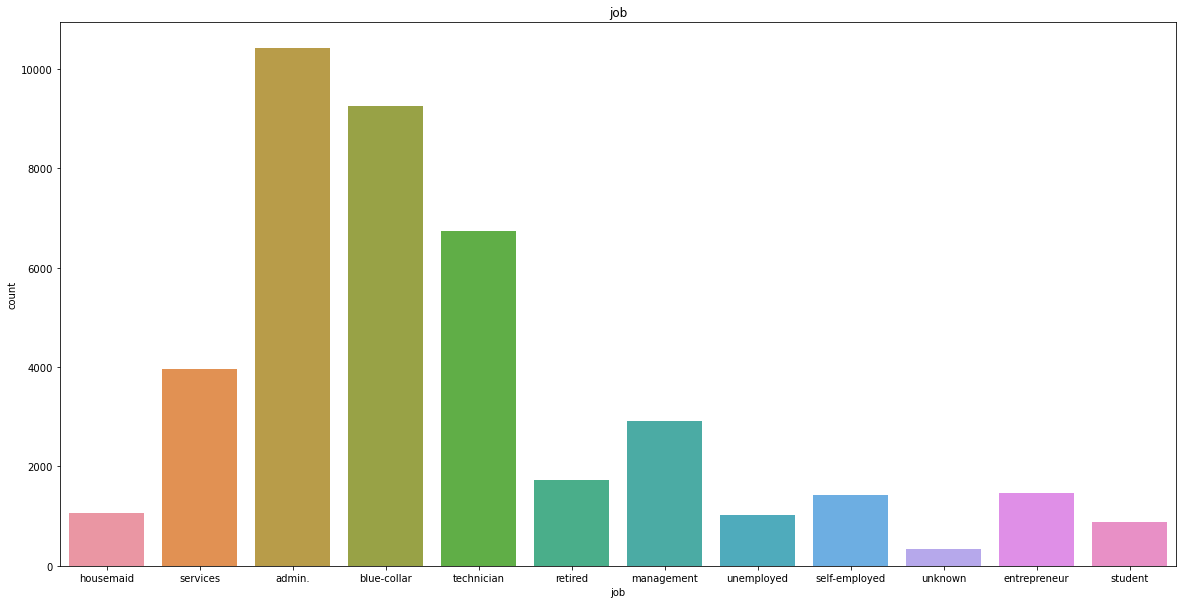

Value Counts of the  marital column is
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 



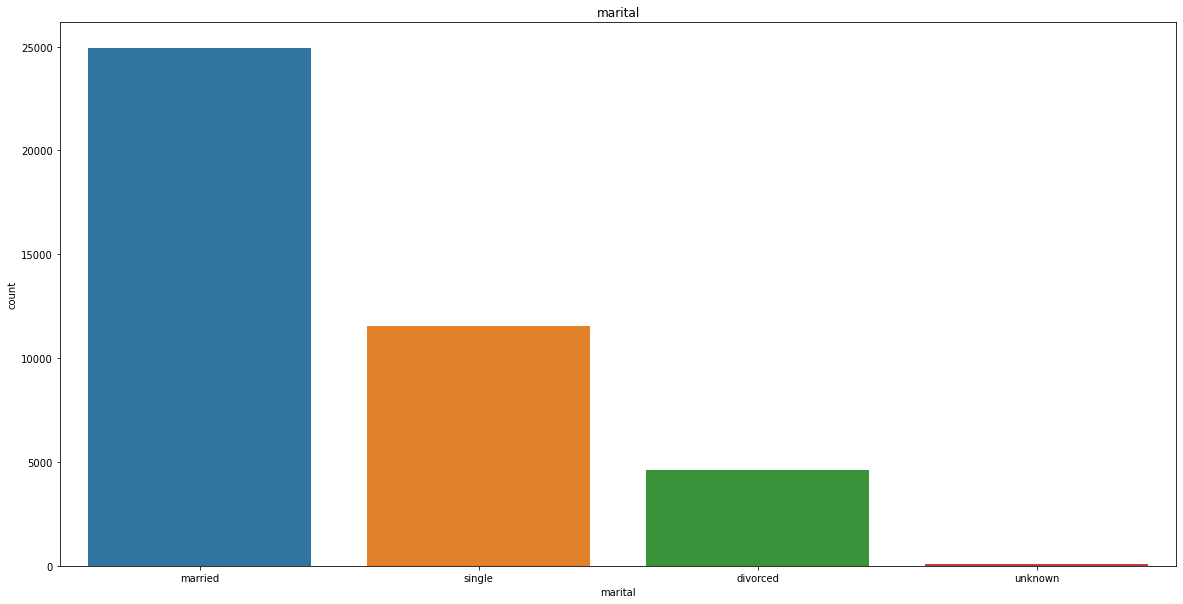

Value Counts of the  education column is
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 



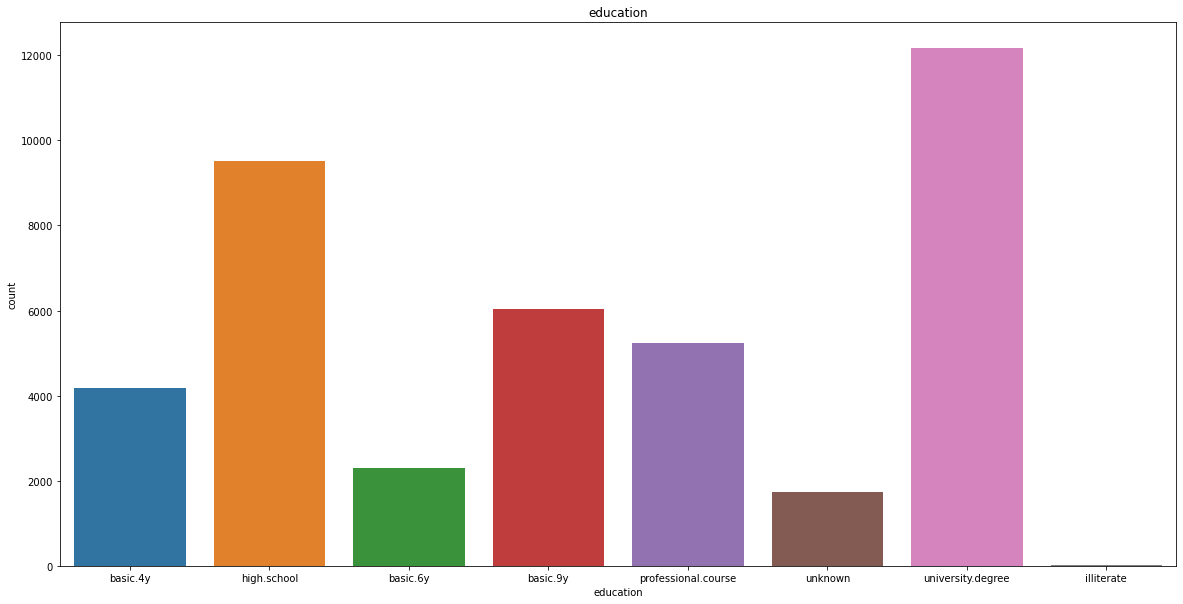

Value Counts of the  default column is
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64 



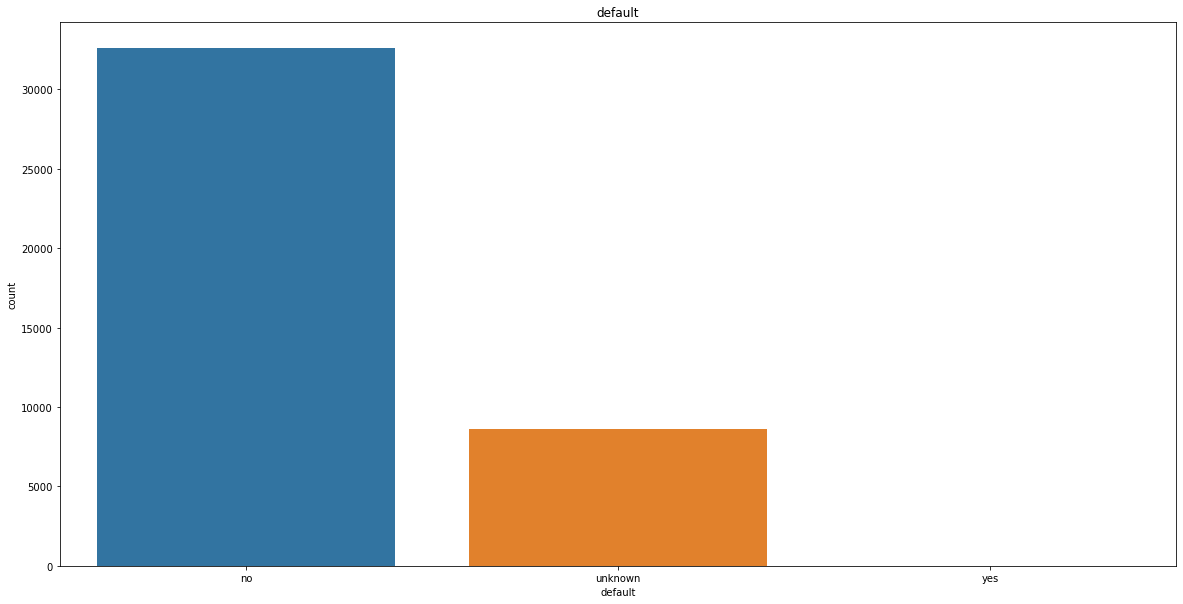

Value Counts of the  housing column is
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 



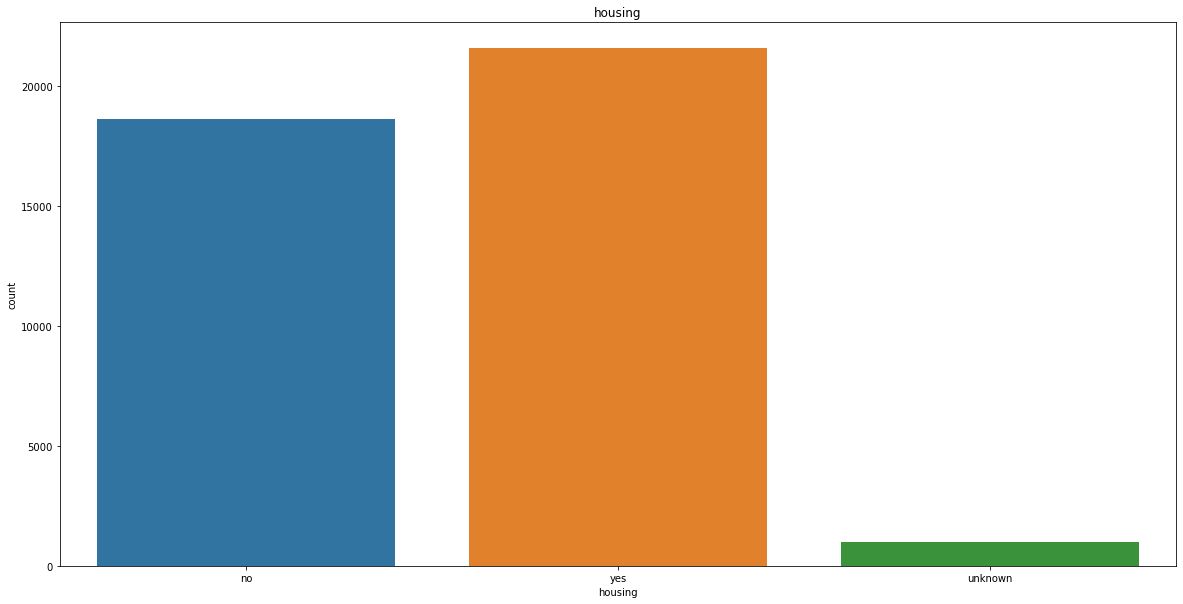

Value Counts of the  loan column is
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 



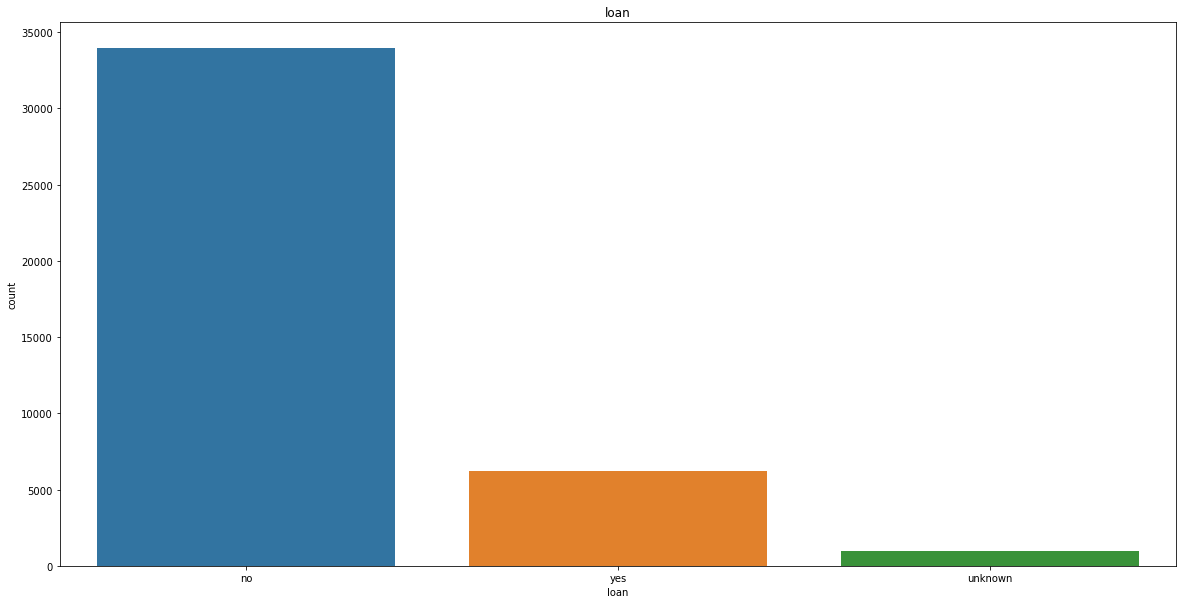

Value Counts of the  contact column is
 cellular     26144
telephone    15044
Name: contact, dtype: int64 



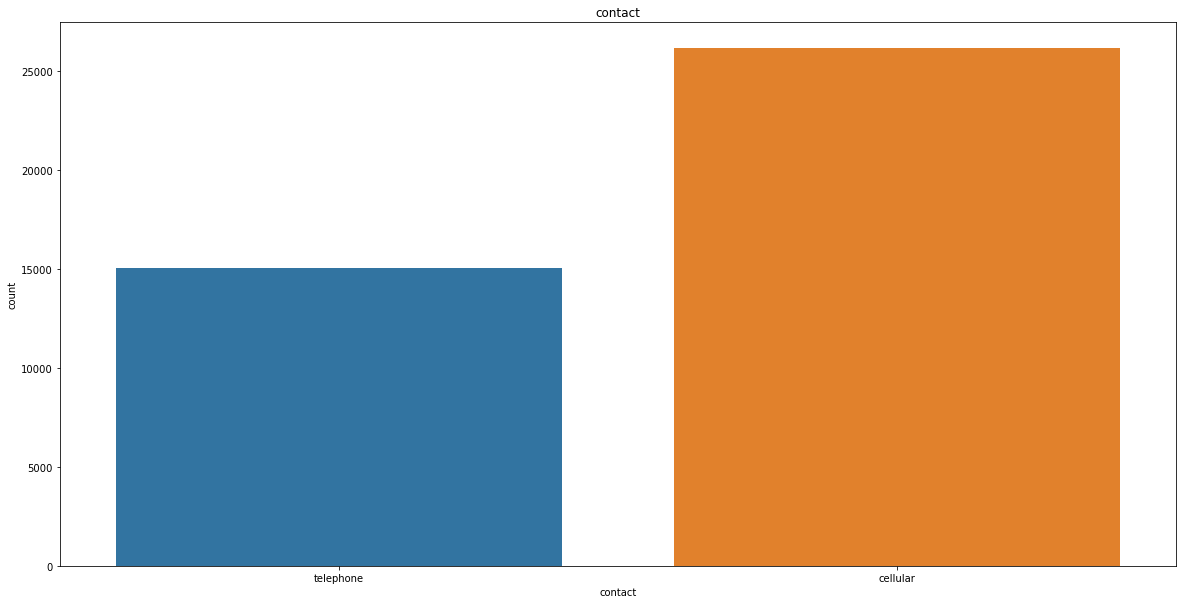

Value Counts of the  month column is
 may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64 



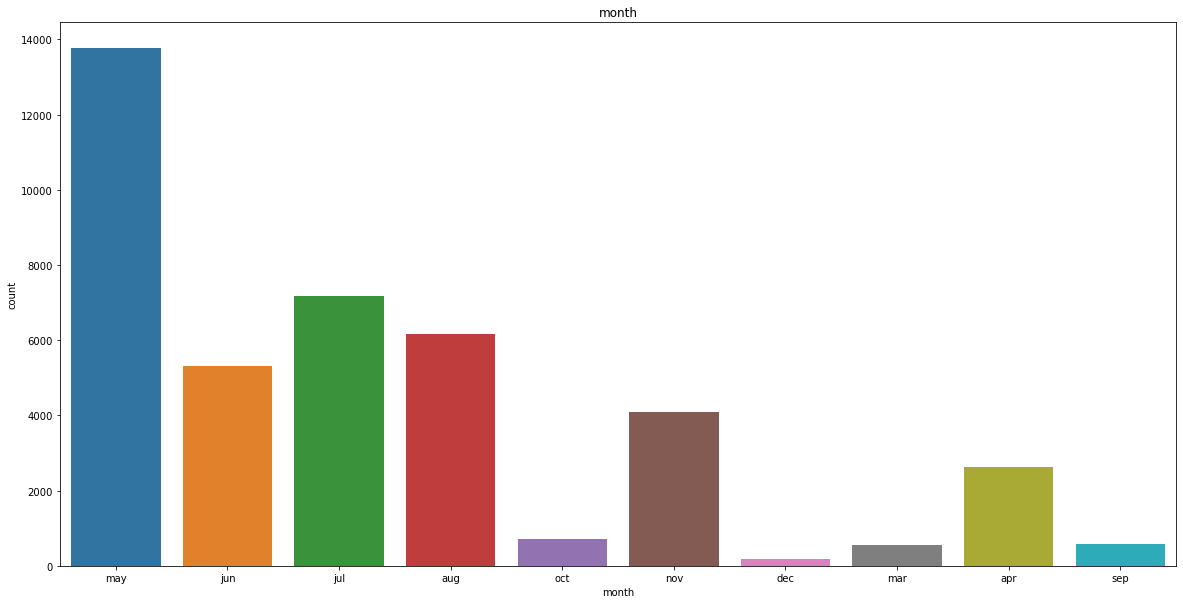

Value Counts of the  day_of_week column is
 thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64 



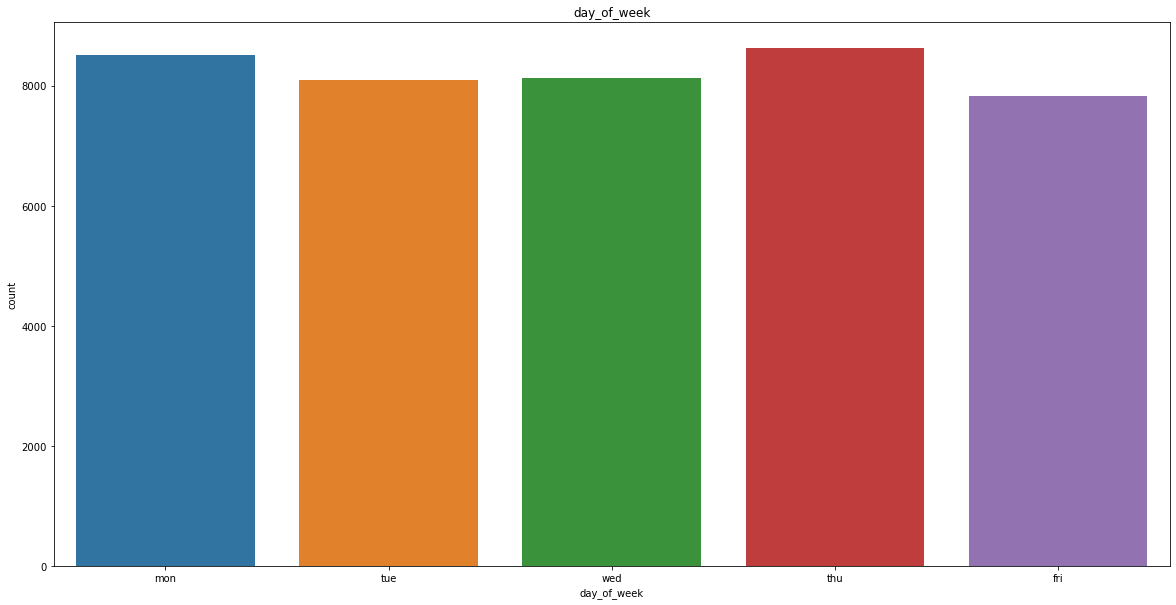

Value Counts of the  campaign column is
 1.0    17642
2.0    10570
3.0     5341
6.0     3385
4.0     2651
5.0     1599
Name: campaign, dtype: int64 



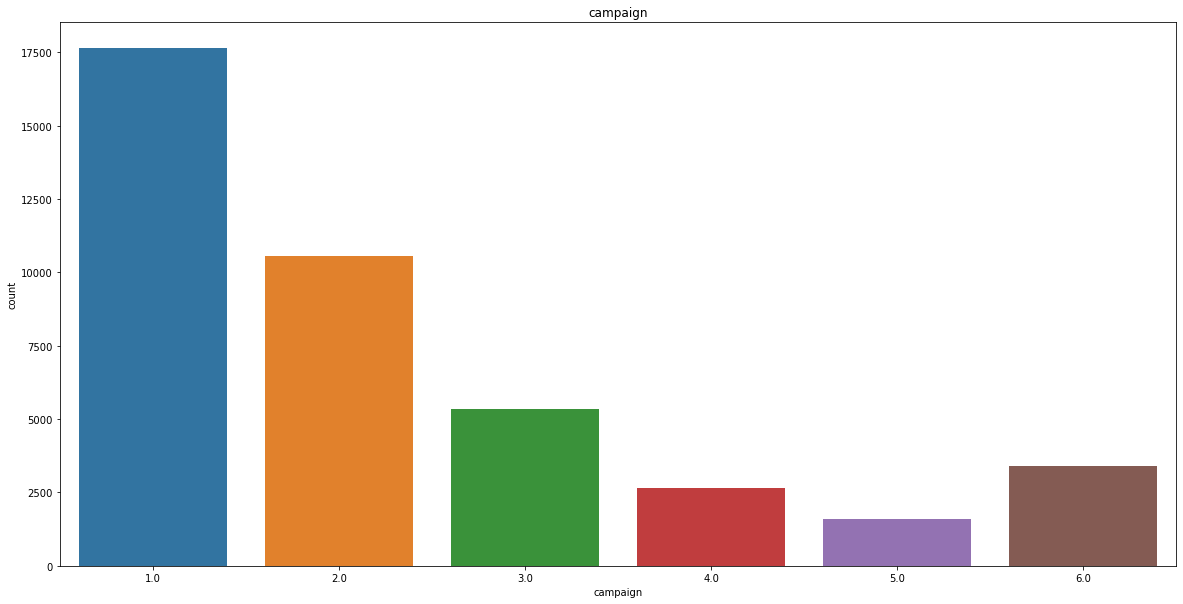

Value Counts of the  previous column is
 0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64 



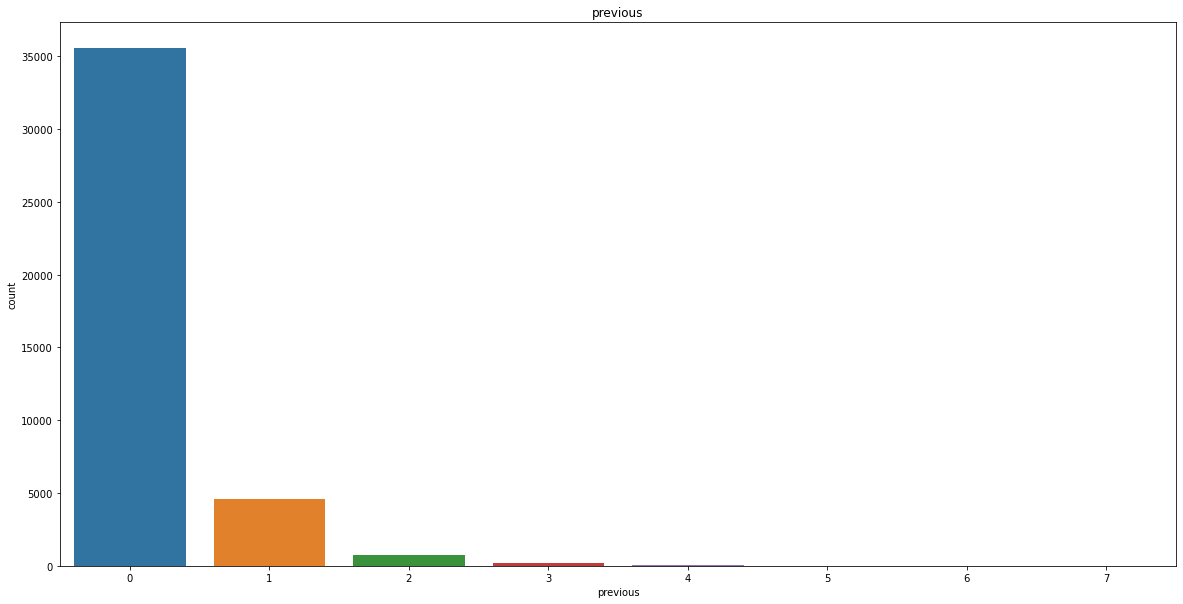

Value Counts of the  poutcome column is
 nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64 



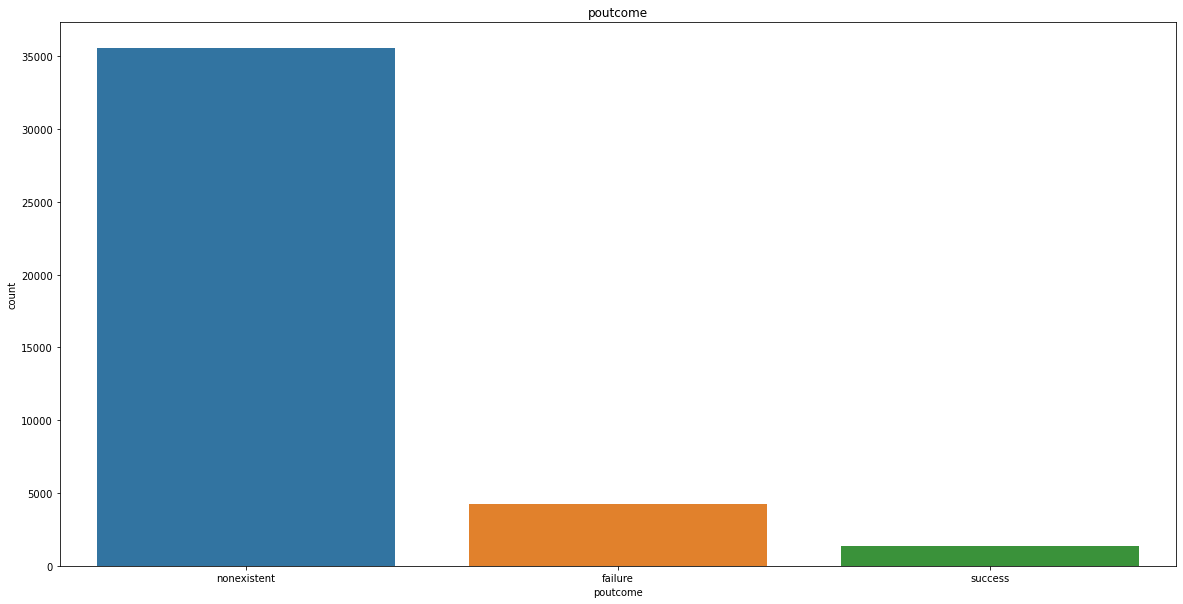

Value Counts of the  emp.var.rate column is
  1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64 



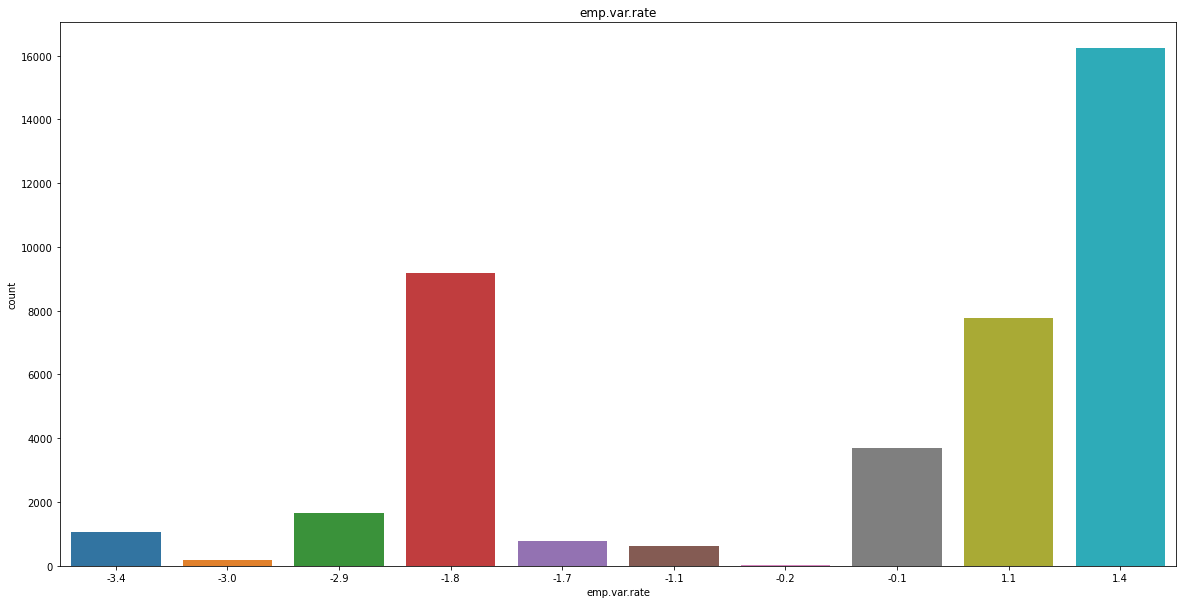

Value Counts of the  nr.employed column is
 5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64 



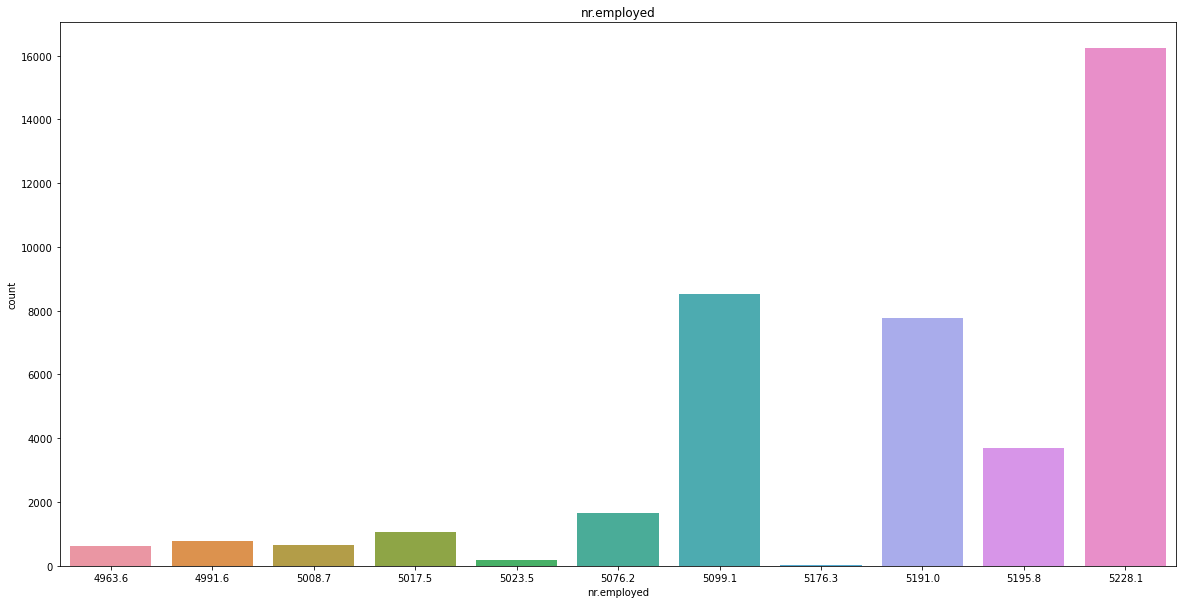

Value Counts of the  y column is
 no     36548
yes     4640
Name: y, dtype: int64 



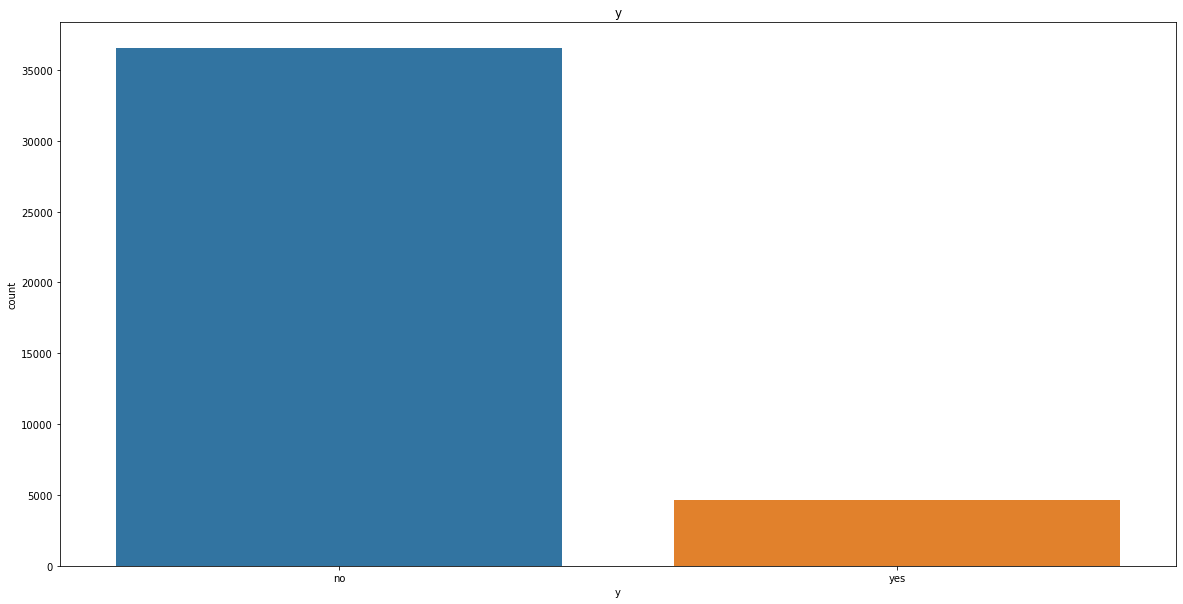

Value Counts of the  Age column is
 30-40     16385
40-50     10240
20-30      7243
50-60      6270
60-70       488
70-80       303
10-20       140
80-90       109
90-100       10
Name: Age, dtype: int64 



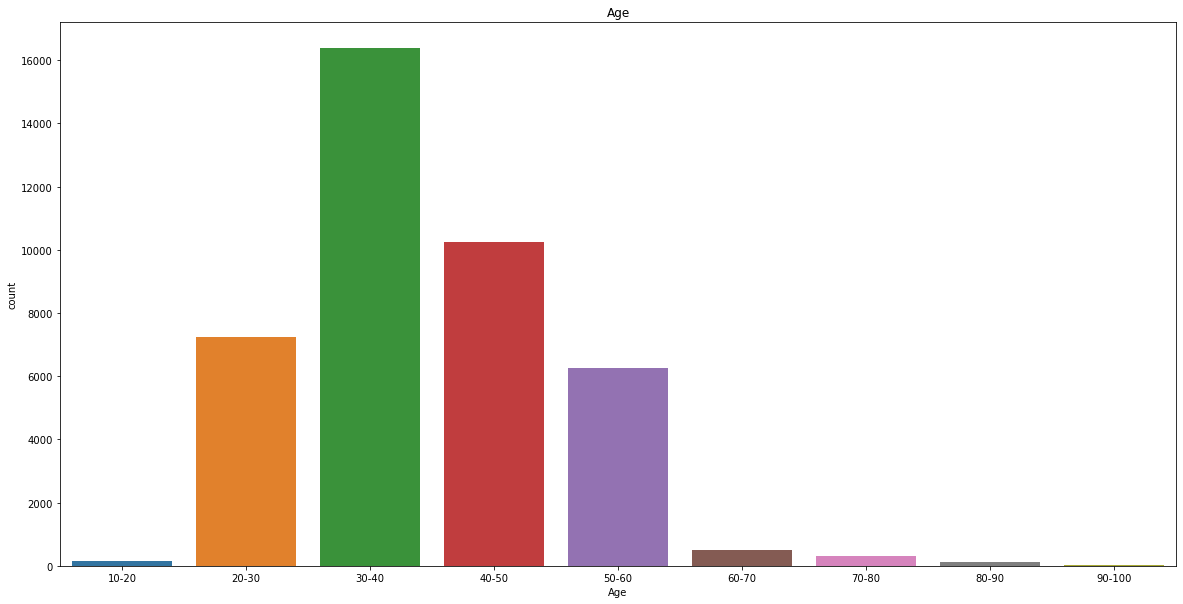

In [45]:
for i in df_cat.columns:
    print('Value Counts of the ',i,'column is\n',df[i].value_counts(),'\n')
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

job


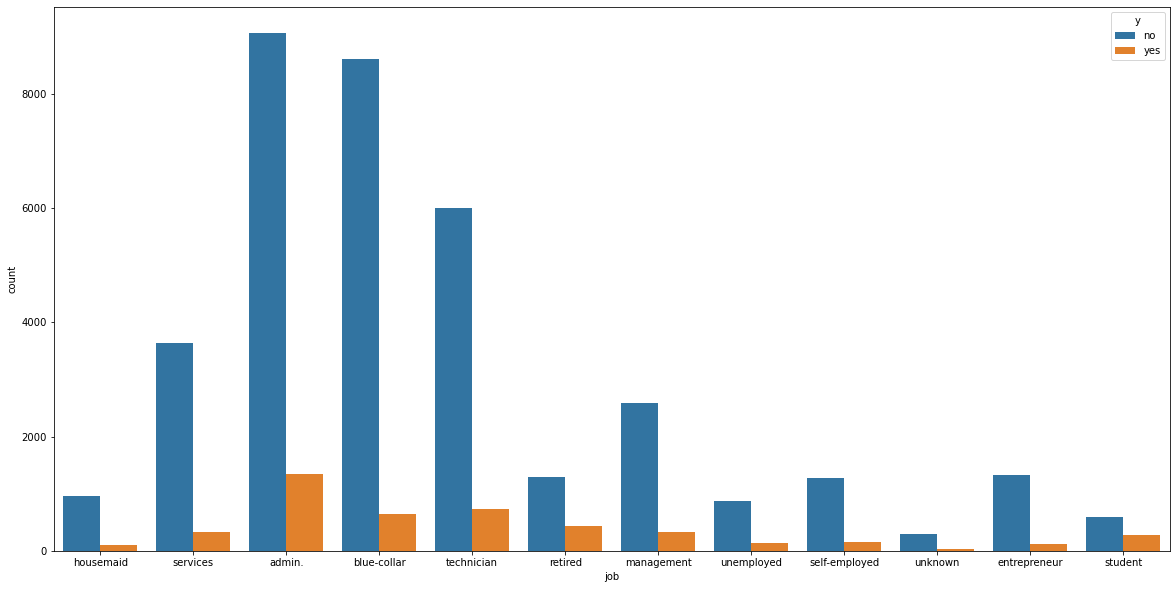

marital


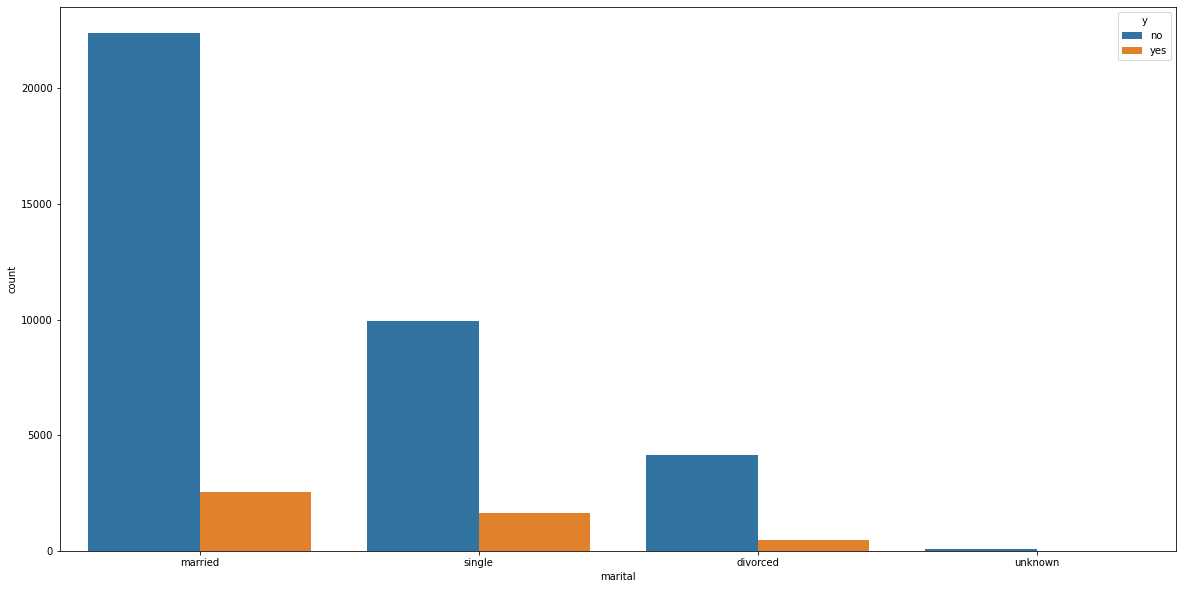

education


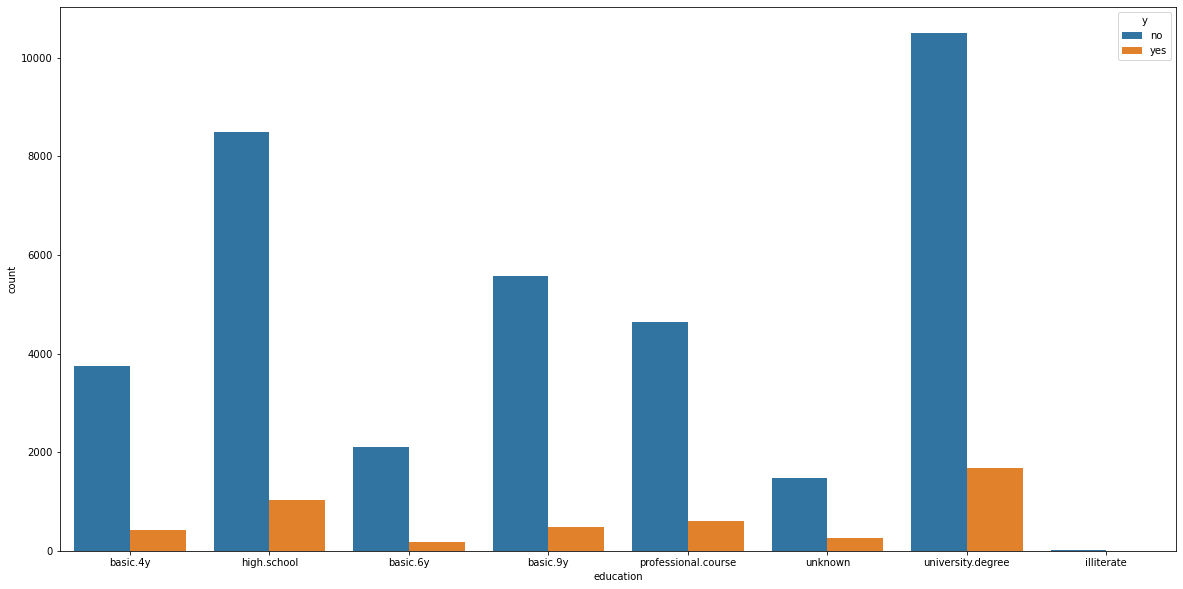

default


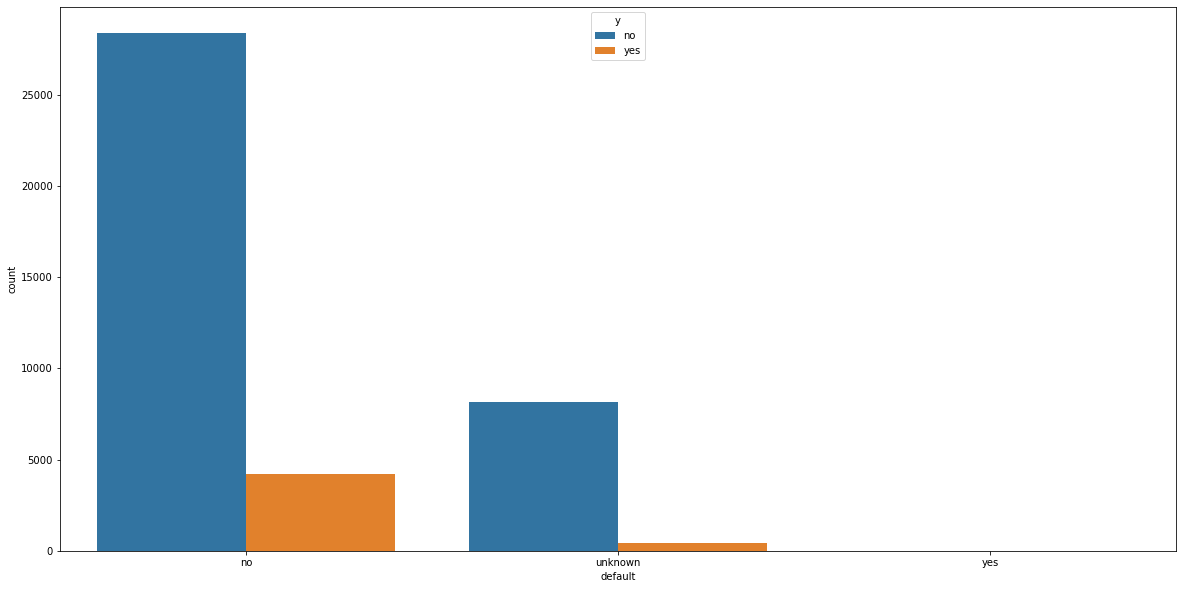

housing


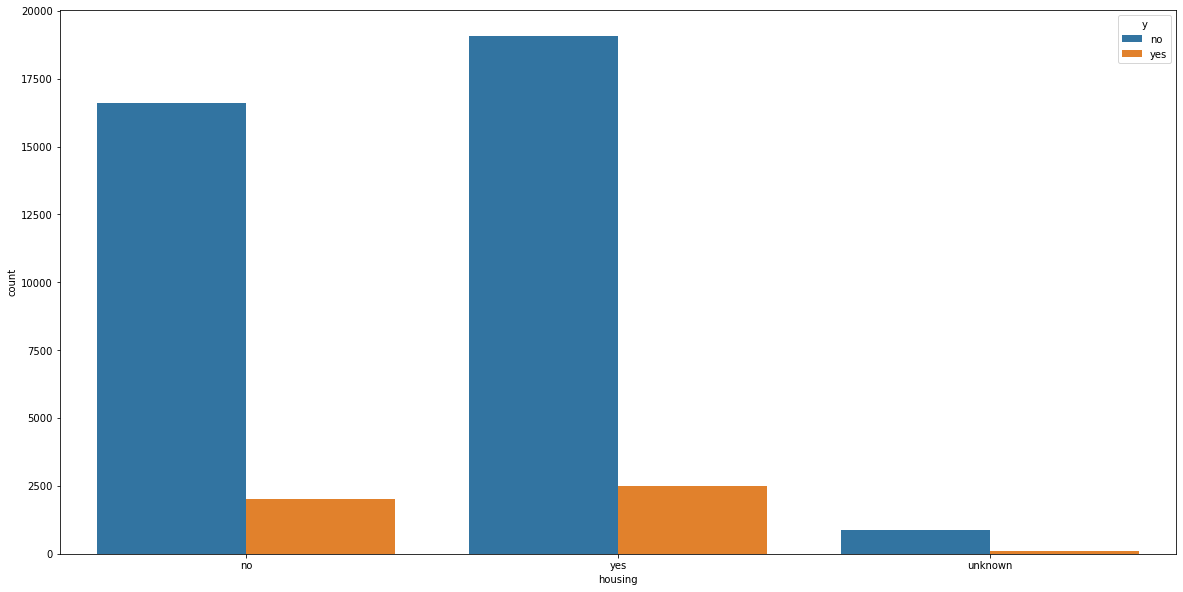

loan


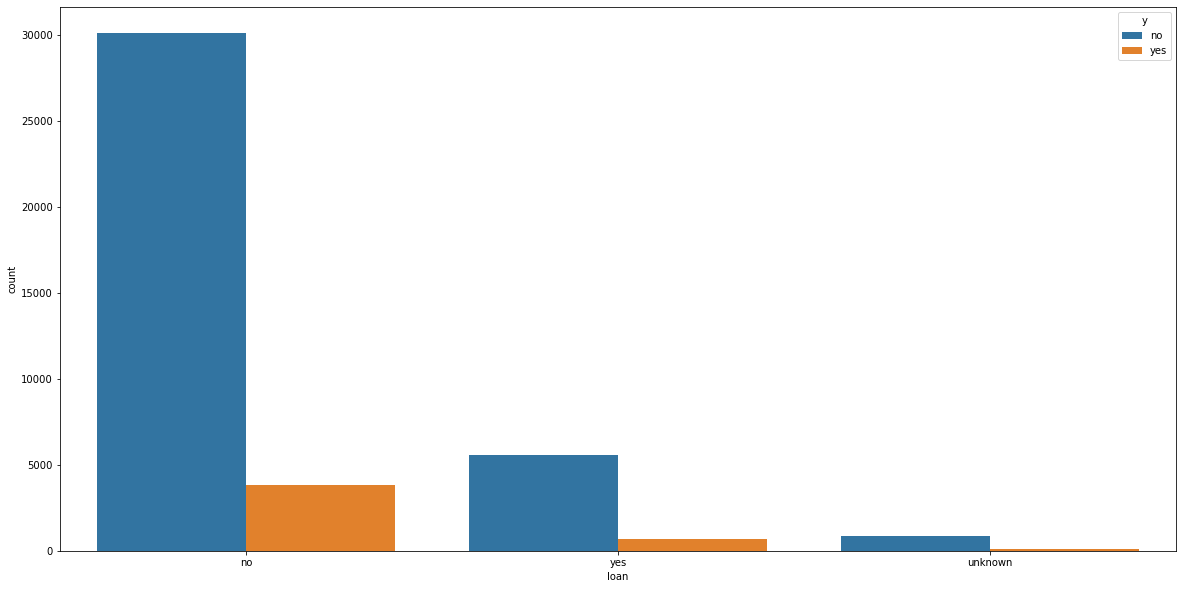

contact


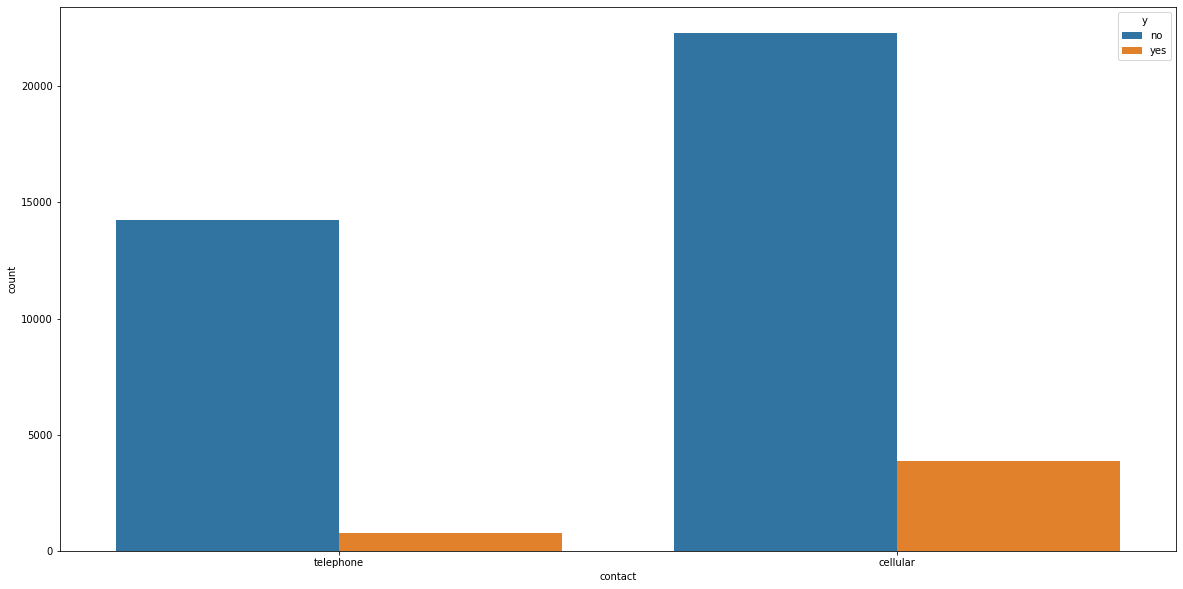

month


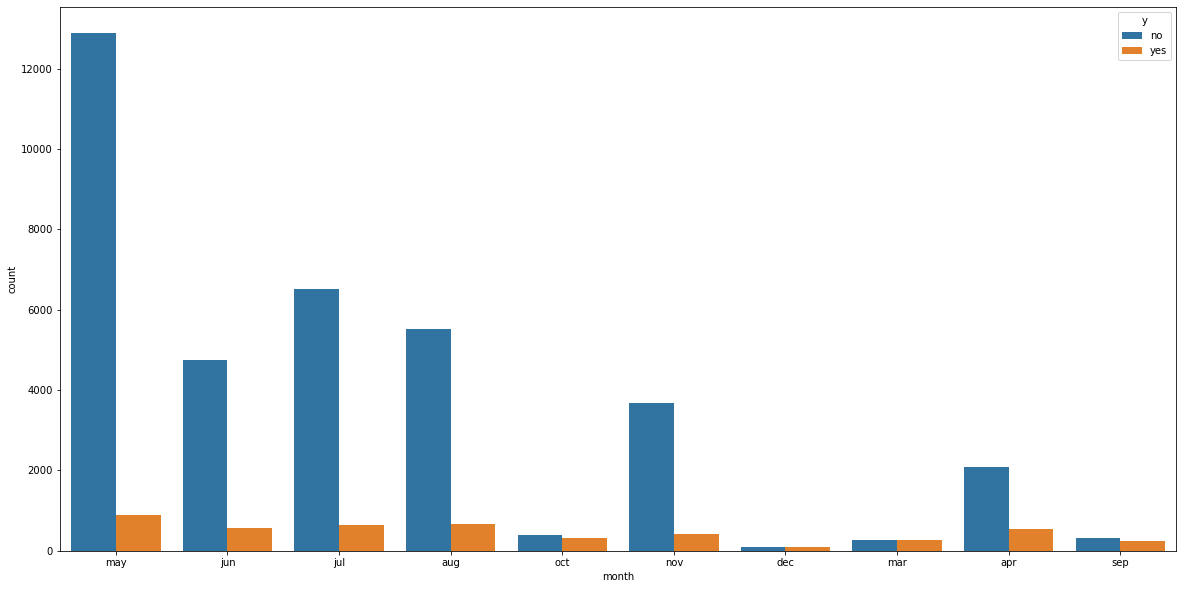

day_of_week


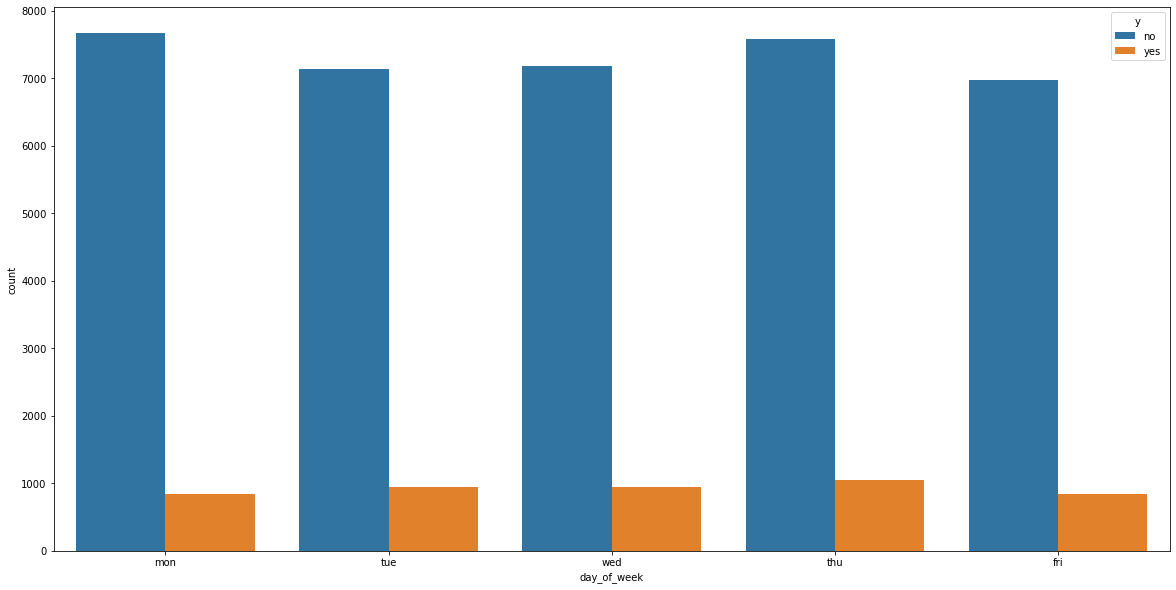

campaign


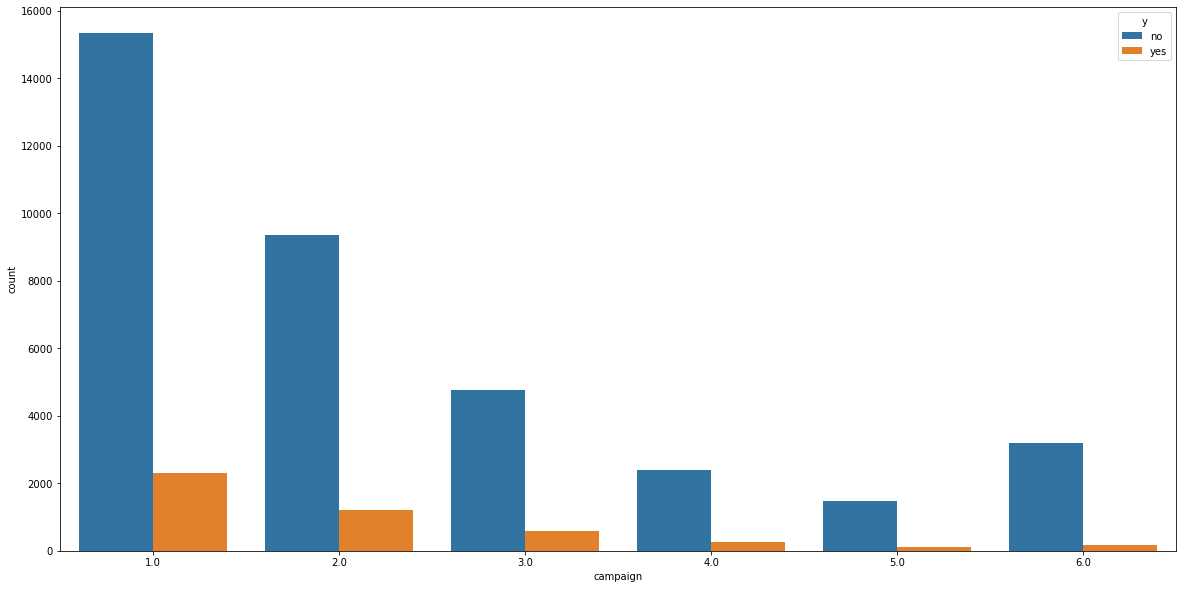

previous


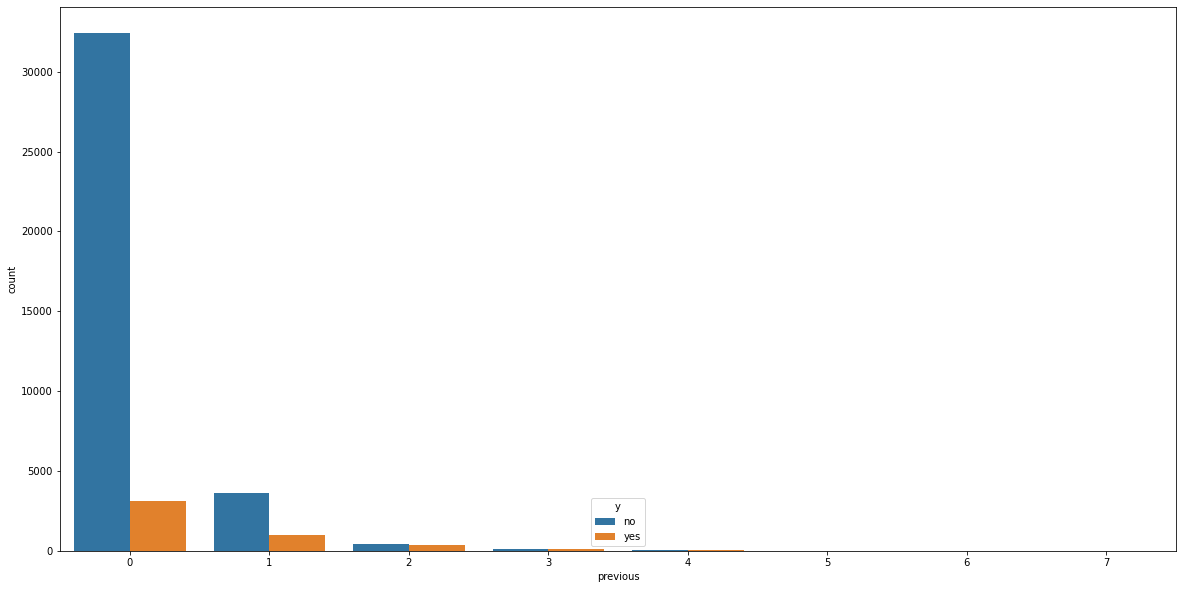

poutcome


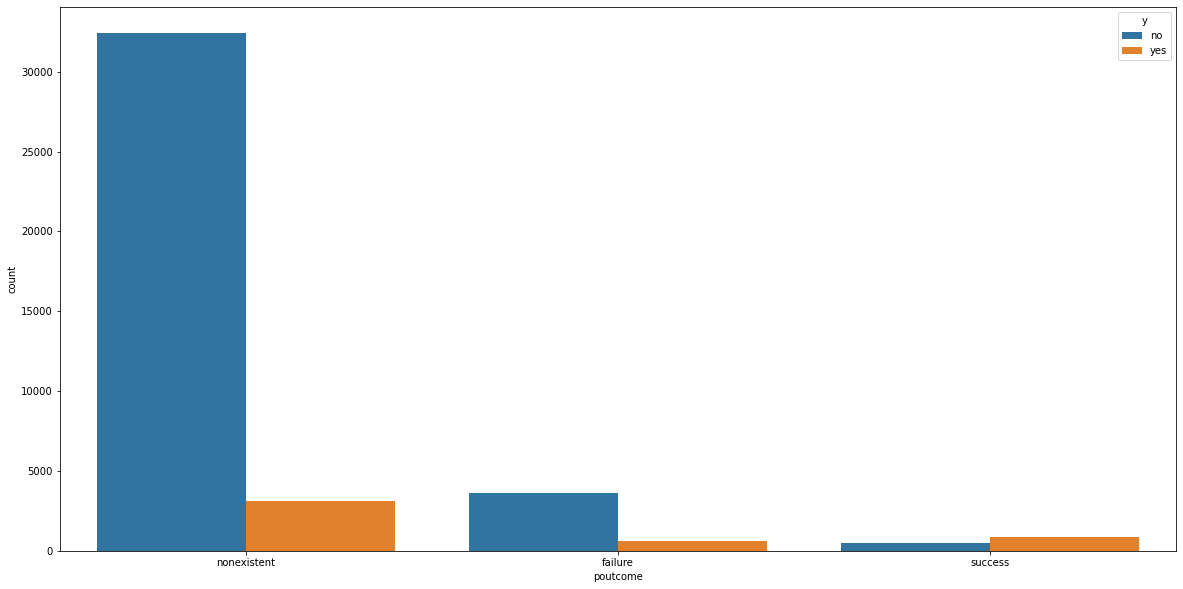

emp.var.rate


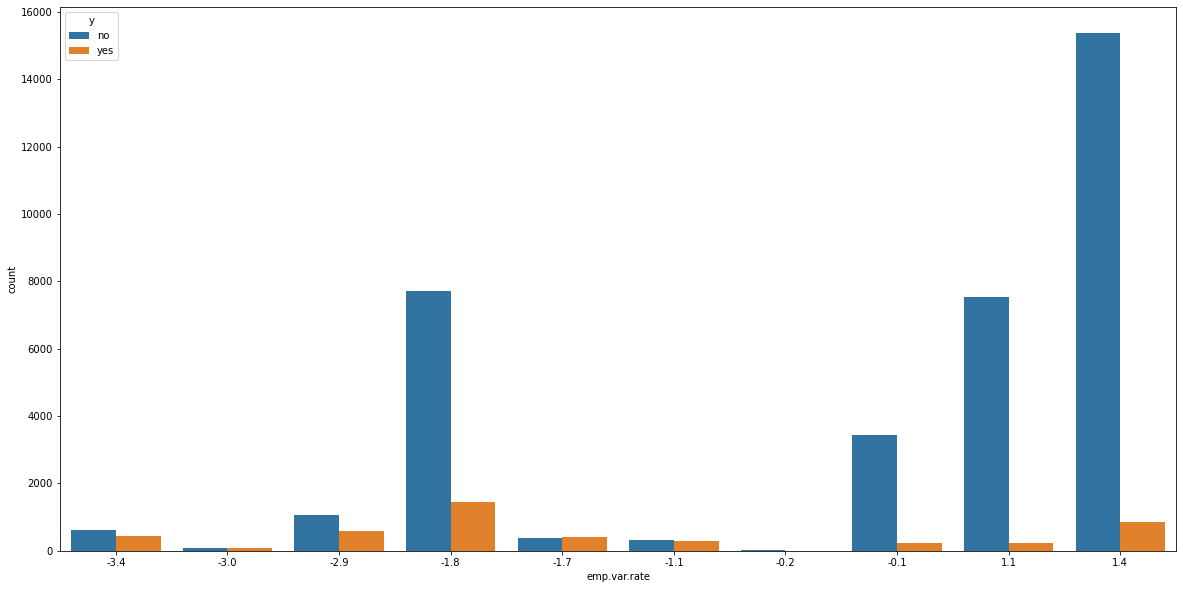

nr.employed


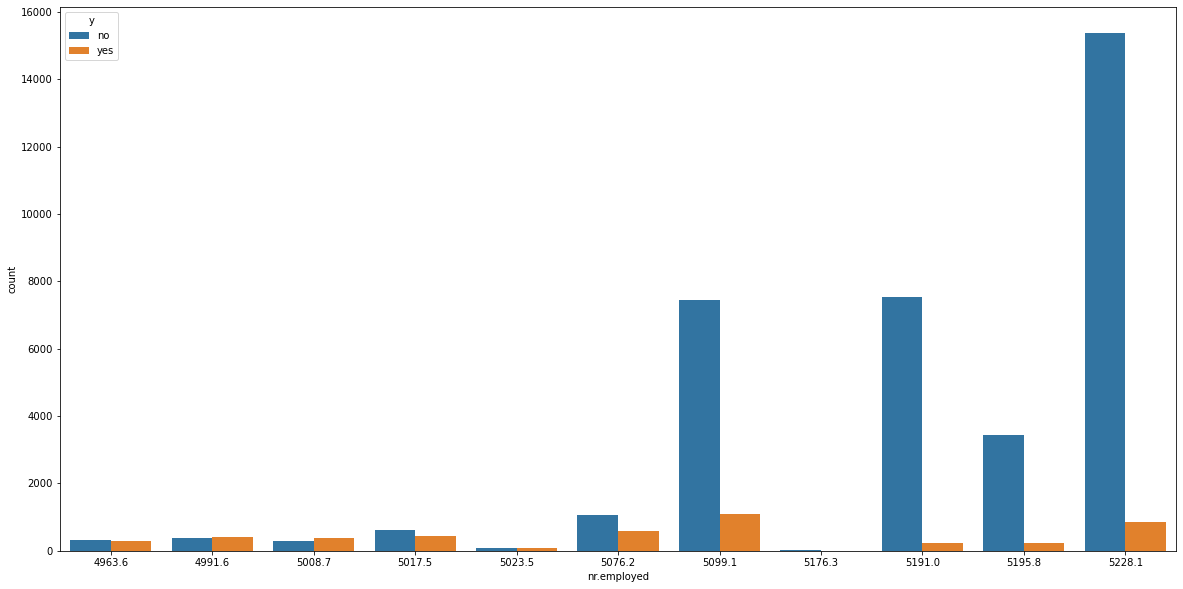

y


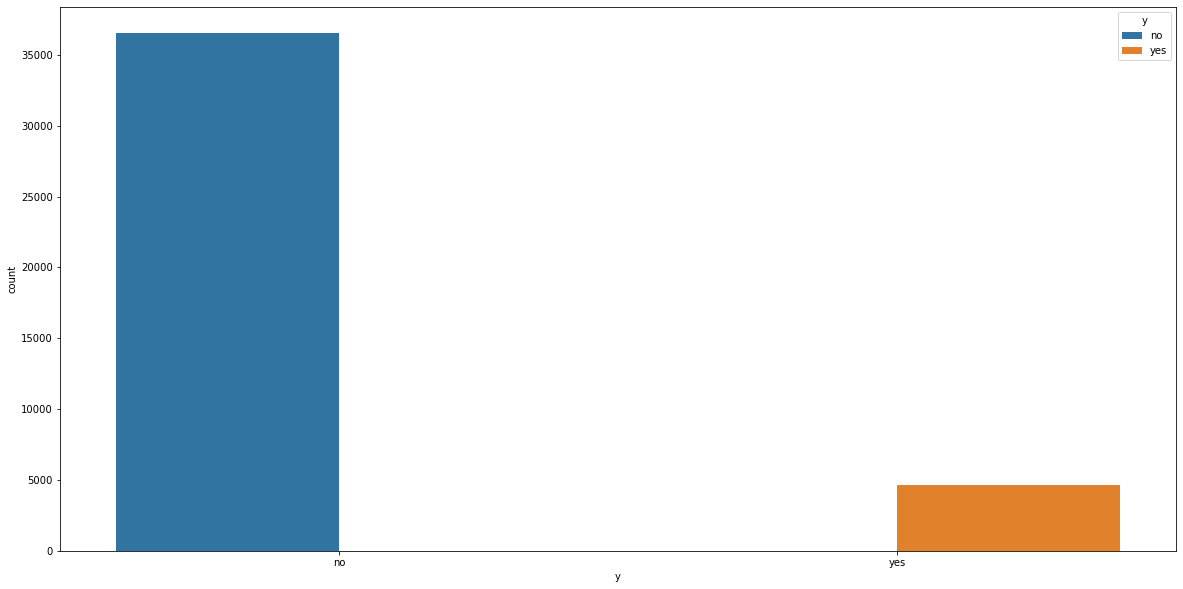

Age


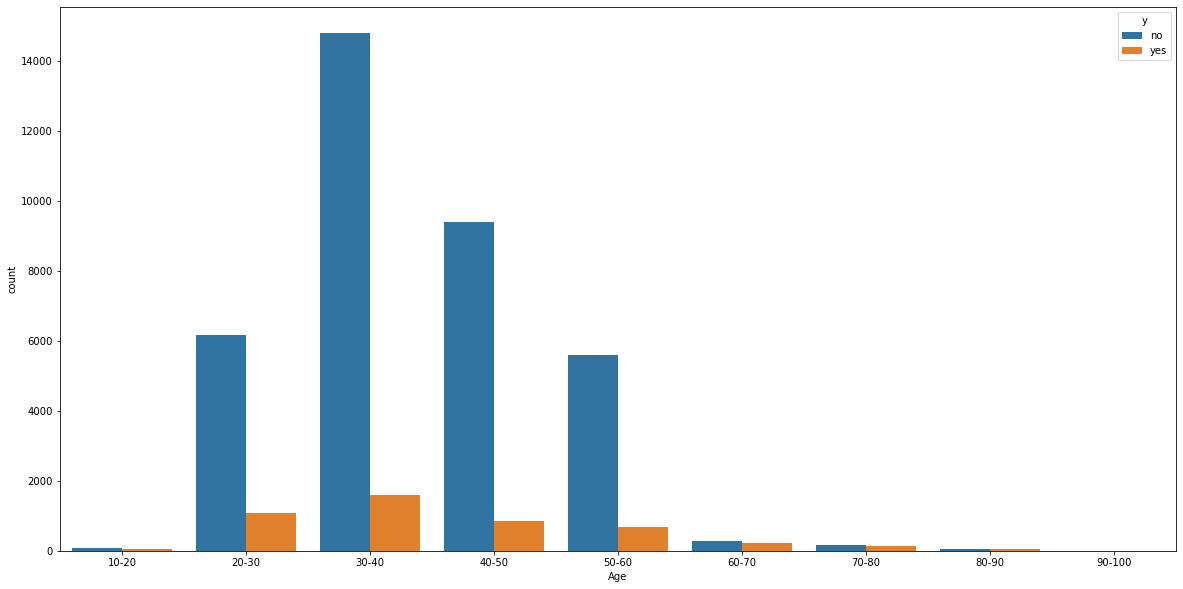

In [46]:
for i in df_cat.columns:
    print(i)
    sns.countplot(df[i],hue=df.y)
    plt.show()

### 1.Job: Highest Number of application are from admin type of job.

### 2.Marital: maximum number of client who approached were married.

### 3.Education: Client with university degree and high school were approached more as compare to other and they have higher success rate as well. (in terms of term deposit number)

### 4.Default: Default variable has no impact on the client subscribing for term deposit. So we will drop this feature.

### 5.Housing: Housing loan does not have much effect on the number of term deposit purchased.

### 6.Loan: We approach around 84% of client with not having personal loan.

### 7.Contact: Around 64% calls are from cellular.

### 8.Month: Around 33% were approached in may and in January, Febuary we don't have data or no one was approached. Success rate was almost same in june, july and August.

### 9.day_of_week: We have 5 days collected values. There is no significant different in the number of client approached and number of people subscribed.

### 10.poutcome: If a client took the term deposit last time than there is higher chances of that client subscribing to it again.

### 11.Age: People of age 20-60 range are the once who have taken subscription.


In [47]:
df.isnull().sum()

job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
Age               0
dtype: int64

# Q2. Perform the following Exploratory Data Analysis tasks:
## a. Missing Value Analysis
## b. Label Encoding wherever required
## c. Selecting important features based on Random Forest
## d. Handling unbalanced data using SMOTE
## e. Standardize the data using the anyone of the scalers provided by sklearn

<AxesSubplot:>

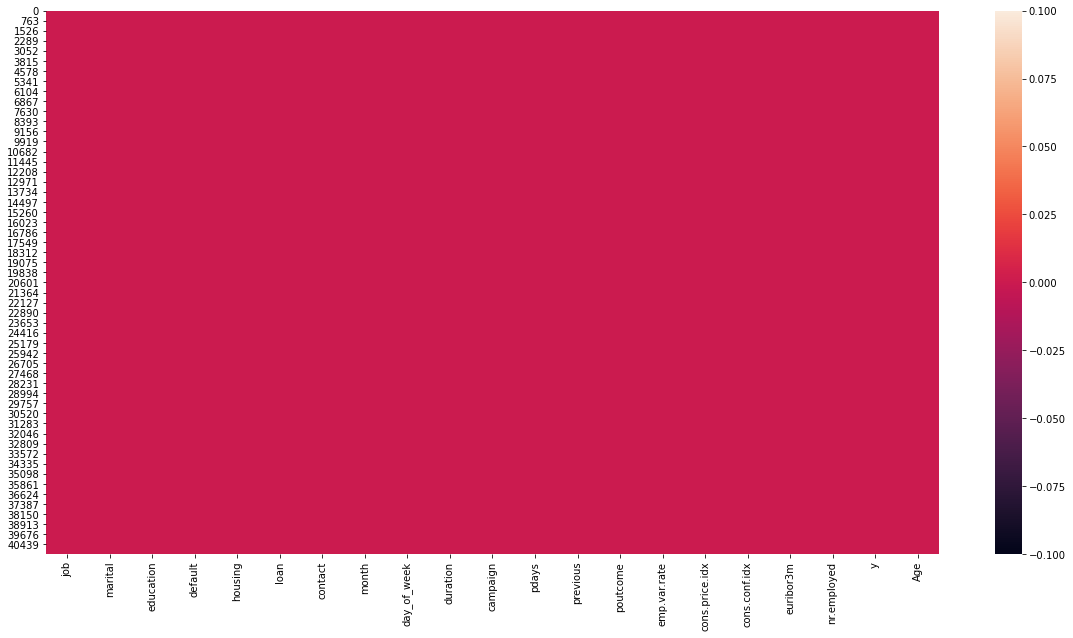

In [142]:
sns.heatmap(df.isnull())

In [48]:
#a
nul = df.isna().sum()
nul[nul>0]

Series([], dtype: int64)

# as we can see that there are no null 

In [49]:
#b
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             41188 non-null  object  
 1   marital         41188 non-null  object  
 2   education       41188 non-null  object  
 3   default         41188 non-null  object  
 4   housing         41188 non-null  object  
 5   loan            41188 non-null  object  
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   duration        41188 non-null  float64 
 10  campaign        41188 non-null  float64 
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  object  
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [50]:
for i in df.columns:
    print(i)
    print(df[i].value_counts(),'\n\n')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 


marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 


education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 


default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 


housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 


loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 


contact
cellular     26144
telephone    150

In [51]:
df.education.replace(['basic.4y','basic.6y','basic.9y'],'basic',inplace=True)


In [52]:
df.education.replace('unknown','illiterate',inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df2 = df.copy()

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             41188 non-null  object  
 1   marital         41188 non-null  object  
 2   education       41188 non-null  object  
 3   default         41188 non-null  object  
 4   housing         41188 non-null  object  
 5   loan            41188 non-null  object  
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   duration        41188 non-null  float64 
 10  campaign        41188 non-null  float64 
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  object  
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [56]:
df_c = df.select_dtypes(['O','category'])

In [57]:
for i in df_c:
    df2[i]= le.fit_transform(df2[i])

<AxesSubplot:>

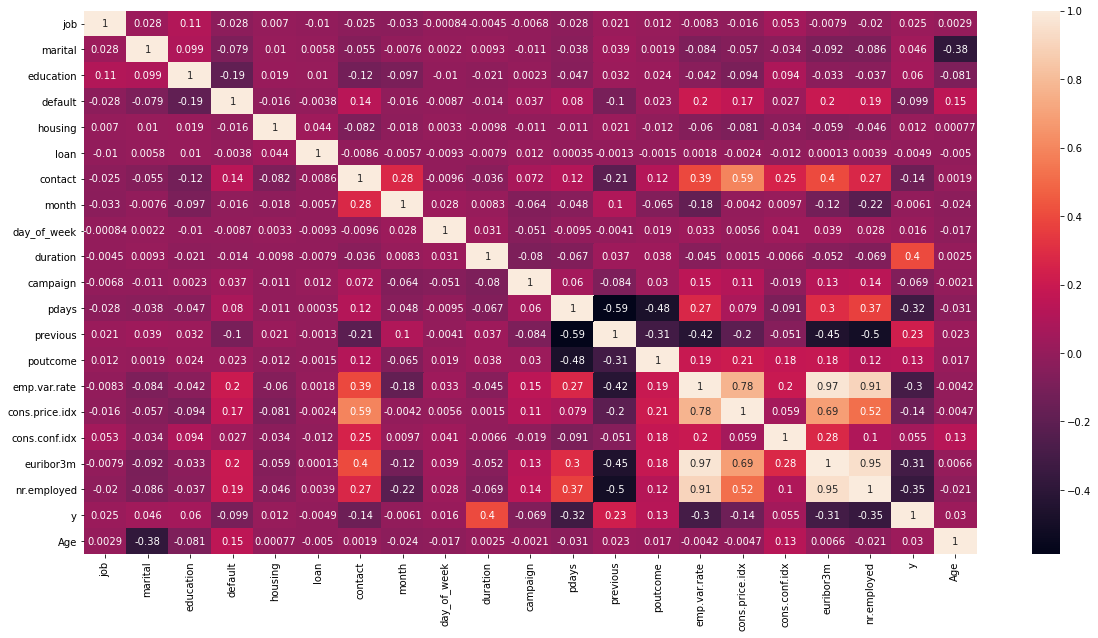

In [58]:
sns.heatmap(df2.corr(),annot=True)

In [59]:
df2.drop(['nr.employed','euribor3m'],axis=1,inplace=True)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

In [62]:
X = df2.drop('y',axis=1)
y = df2.y

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)


In [64]:
print(X_train.shape,y_train.shape)

(28831, 18) (28831,)


In [65]:
print(X_test.shape,y_test.shape)

(12357, 18) (12357,)


In [66]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [67]:
sel.get_support()

array([ True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False,  True])

In [68]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [69]:
selected_feat

Index(['job', 'day_of_week', 'duration', 'emp.var.rate', 'Age'], dtype='object')

In [70]:
random = RandomForestClassifier(n_estimators = 150) 
random_forest = random.fit(X_train, y_train)

In [71]:
df1 = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': random_forest.feature_importances_*100}).\
                    sort_values('importance', ascending=False)

In [72]:
df1

,feature,importance
9,duration,29.974974
0,job,6.734198
8,day_of_week,6.400949
17,Age,6.225517
14,emp.var.rate,5.658425
16,cons.conf.idx,5.628287
10,campaign,5.464973
15,cons.price.idx,4.882492
11,pdays,4.824540
2,education,4.749604


In [73]:
#rf = RandomForestRegressor(random_state=0)

#rf.fit(X_train_sm,y_train_sm)

In [74]:
df_imp = df2[['job', 'day_of_week', 'duration', 'emp.var.rate', 'Age']]
df_imp

,job,day_of_week,duration,emp.var.rate,Age
0,3,1,261.0,1.1,4
1,7,1,149.0,1.1,4
2,7,1,226.0,1.1,2
3,0,1,151.0,1.1,2
4,7,1,307.0,1.1,4
...,...,...,...,...,...
41183,5,0,334.0,-1.1,6
41184,1,0,383.0,-1.1,3
41185,5,0,189.0,-1.1,4
41186,9,0,442.0,-1.1,3


In [75]:
X = df_imp
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [76]:
#selected_features = np.array(X_train_sm.columns)[rfe.get_support()]


In [77]:
#f_i = list(zip(X_train_sm.columns,rf.feature_importances_))
#f_i.sort(key = lambda x : x[1])
#plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

#plt.show()

In [78]:
#rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error")

#rfe.fit(X_train_sm,y_train_sm)

In [79]:
#selected_features = np.array(X_train_sm.columns)[rfe.get_support()]
#len(selected_features)

In [80]:
# d

In [81]:
from imblearn.over_sampling import SMOTE            #We use SMOTE for imbalanced classification
from collections import Counter
counter = Counter(y)
print('Before Smote:', counter)
smt = SMOTE(random_state=0)
X_sm, y_sm = smt.fit_resample(X, y)
counter1 = Counter(y_sm)
print('After Smote:',counter1)

Before Smote: Counter({0: 36548, 1: 4640})
After Smote: Counter({0: 36548, 1: 36548})


In [82]:
# e
X_sm

,job,day_of_week,duration,emp.var.rate,Age
0,3,1,261.000000,1.100000,4
1,7,1,149.000000,1.100000,4
2,7,1,226.000000,1.100000,2
3,0,1,151.000000,1.100000,2
4,7,1,307.000000,1.100000,4
...,...,...,...,...,...
73091,9,4,311.000000,-1.792406,1
73092,0,1,330.468726,-1.943706,1
73093,0,1,367.000000,-1.963168,3
73094,0,3,406.000000,-1.883916,1


In [83]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [84]:
scaled_f = mms.fit_transform(X_sm)


In [85]:
X_ssm = pd.DataFrame(scaled_f,columns = X_sm.columns)

In [86]:
X_ssm

,job,day_of_week,duration,emp.var.rate,Age
0,0.272727,0.25,0.404965,0.937500,0.500
1,0.636364,0.25,0.231187,0.937500,0.500
2,0.636364,0.25,0.350659,0.937500,0.250
3,0.000000,0.25,0.234290,0.937500,0.250
4,0.636364,0.25,0.476338,0.937500,0.500
...,...,...,...,...,...
73091,0.818182,1.00,0.482545,0.334915,0.125
73092,0.000000,0.25,0.512752,0.303395,0.125
73093,0.000000,0.25,0.569434,0.299340,0.375
73094,0.000000,0.75,0.629946,0.315851,0.125


# Q3. Build the following Supervised Learning models:
## a. Logistic Regression
## b. AdaBoost
## c. Naïve Bayes
## d. KNN
## e. SVM

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X_ssm,y_sm,test_size=0.3,random_state=10)

In [88]:
print("X_train :",X_train.shape,"X_test :",X_test.shape,"ytrain :",y_train.shape,"y_test :",y_test.shape)

X_train : (51167, 5) X_test : (21929, 5) ytrain : (51167,) y_test : (21929,)


In [89]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,plot_confusion_matrix,plot_roc_curve

MLA = [                                                #Creating a list of All Classification Algorithms
       linear_model.LogisticRegression(),
       ensemble.AdaBoostClassifier(),
       naive_bayes.GaussianNB(),
       neighbors.KNeighborsClassifier(),
       svm.SVC()
]

In [90]:
name = []
testscore = []
trainscore = []
for alg in MLA:
    name.append(alg.__class__.__name__)
    alg.fit(X_train, y_train)
    test_pred = alg.predict(X_test)
    testscore.append(accuracy_score(y_test,test_pred))
    train_pred = alg.predict(X_train)
    trainscore.append(accuracy_score(y_train, train_pred))
    print(classification_report(y_test,test_pred))   
    print(alg.__class__.__name__)
    print(confusion_matrix(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84     10975
           1       0.82      0.88      0.85     10954

    accuracy                           0.84     21929
   macro avg       0.85      0.84      0.84     21929
weighted avg       0.85      0.84      0.84     21929

LogisticRegression
[[8825 2150]
 [1268 9686]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     10975
           1       0.88      0.89      0.89     10954

    accuracy                           0.89     21929
   macro avg       0.89      0.89      0.89     21929
weighted avg       0.89      0.89      0.89     21929

AdaBoostClassifier
[[9670 1305]
 [1155 9799]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84     10975
           1       0.82      0.90      0.86     10954

    accuracy                           0.85     21929
   macro avg       0.85      0.85   

# Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not.

In [91]:
comparison_1 = pd.DataFrame({"name": name, "test score": testscore, 'train score': trainscore })
comparison_1

,name,test score,train score
0,LogisticRegression,0.844133,0.844822
1,AdaBoostClassifier,0.887820,0.888874
2,GaussianNB,0.849423,0.848613
3,KNeighborsClassifier,0.886543,0.916626
4,SVC,0.862784,0.864698


## By seeing the above table it is giving 88.7% test f1_score and 88.8 train f1_Score so we are suggesting to go with AdaBoostClassifier Algorithm.

# 

# Part II: Time Series

## Q1. Get the modal price of onion for each month for the Mumbai market (Hint: set monthly date as index and drop redundant columns)

In [92]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [93]:
data = pd.read_csv('C:/Users/pilot/Downloads/Paper1/MonthWiseMarketArrivals_Clean.csv')
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [94]:
data['date']=pd.DatetimeIndex(data.date)

In [95]:
data1=data.set_index('date')
data1

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR
...,...,...,...,...,...,...,...,...,...
2011-12-01,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA
2012-12-01,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA
2013-12-01,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA


In [96]:
data1=data1.sort_values(by='date')
data1.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [97]:
data1_mumbai=data1.loc[data1.city=='MUMBAI']
data1_mumbai.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2004-01-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI
2004-02-01,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI
2004-03-01,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI
2004-04-01,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI
2004-05-01,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI


In [98]:
data1_mumbai=data1_mumbai.drop(["market","month","year","priceMin","priceMax","state","city"],axis=1)
data1_mumbai.head()

,quantity,priceMod
date,,
2004-01-01,267100,849
2004-02-01,239350,736
2004-03-01,238000,498
2004-04-01,198200,397
2004-05-01,166430,405


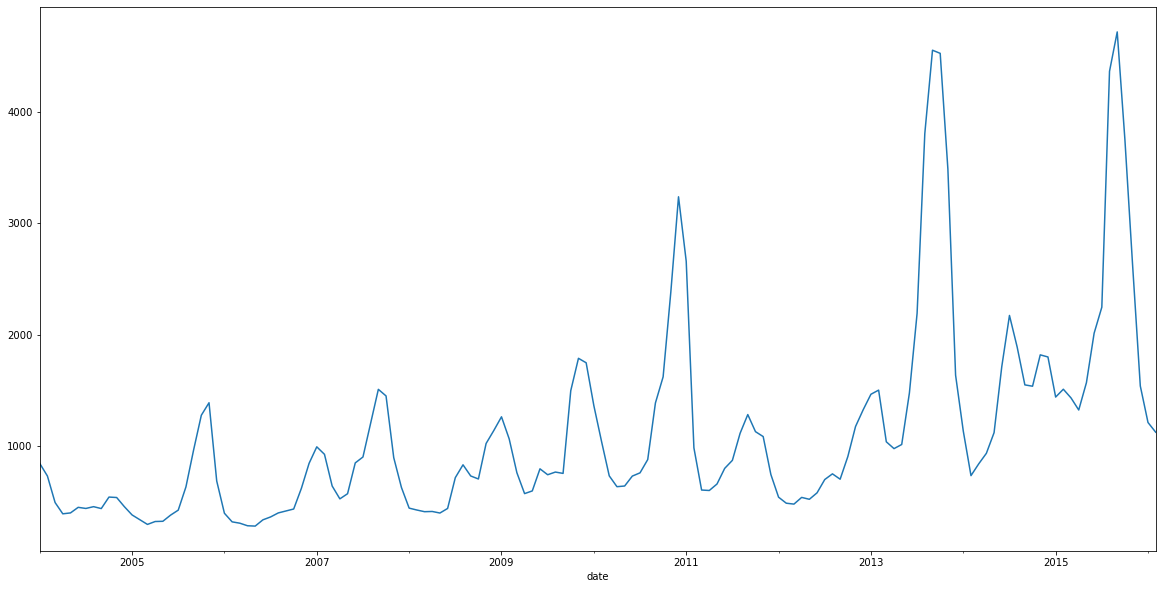

In [99]:
data1_mumbai.priceMod.plot()
plt.show()

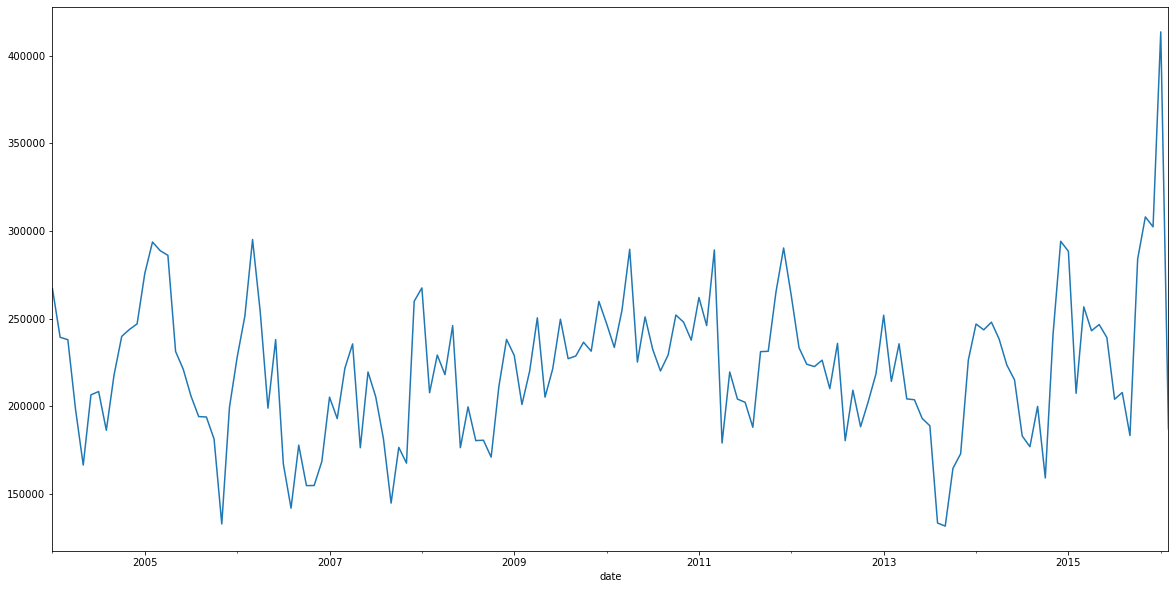

In [100]:
data1_mumbai.quantity.plot()
plt.show()

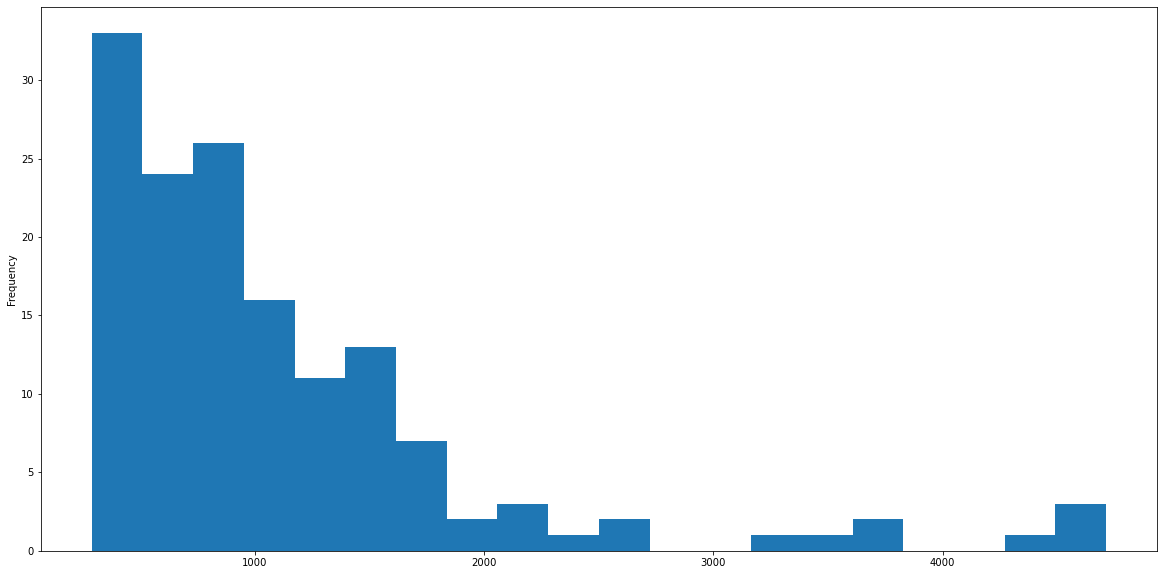

In [101]:
data1_mumbai.priceMod.plot(kind='hist',bins=20)
plt.show()

<AxesSubplot:ylabel='Frequency'>

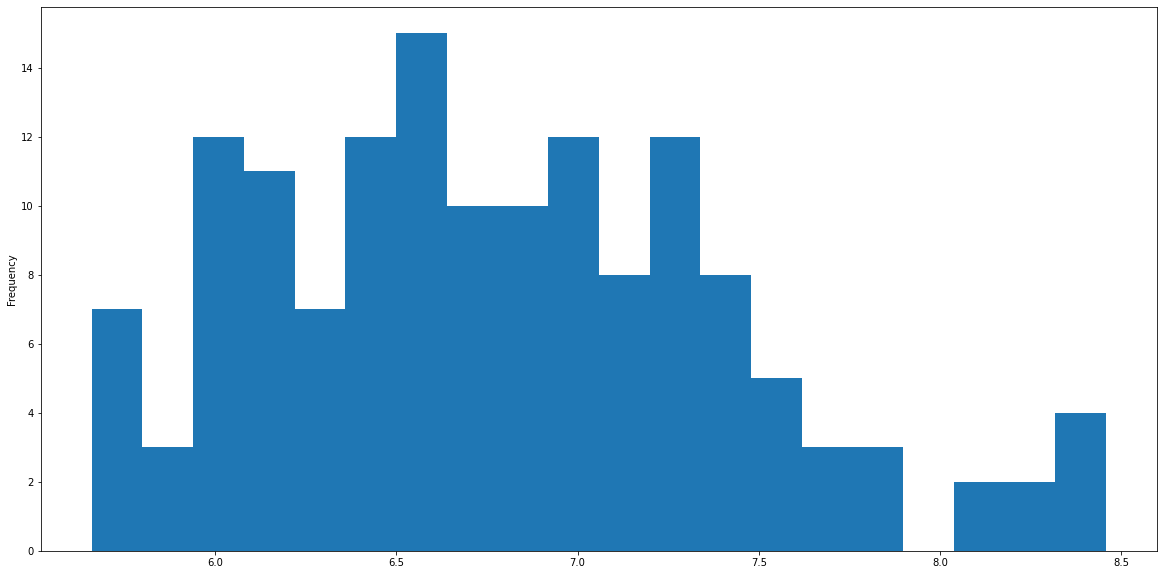

In [102]:
data1_mumbai['log_priceMod']=np.log(data1_mumbai.priceMod)
data1_mumbai.log_priceMod.plot(kind='hist',bins=20)

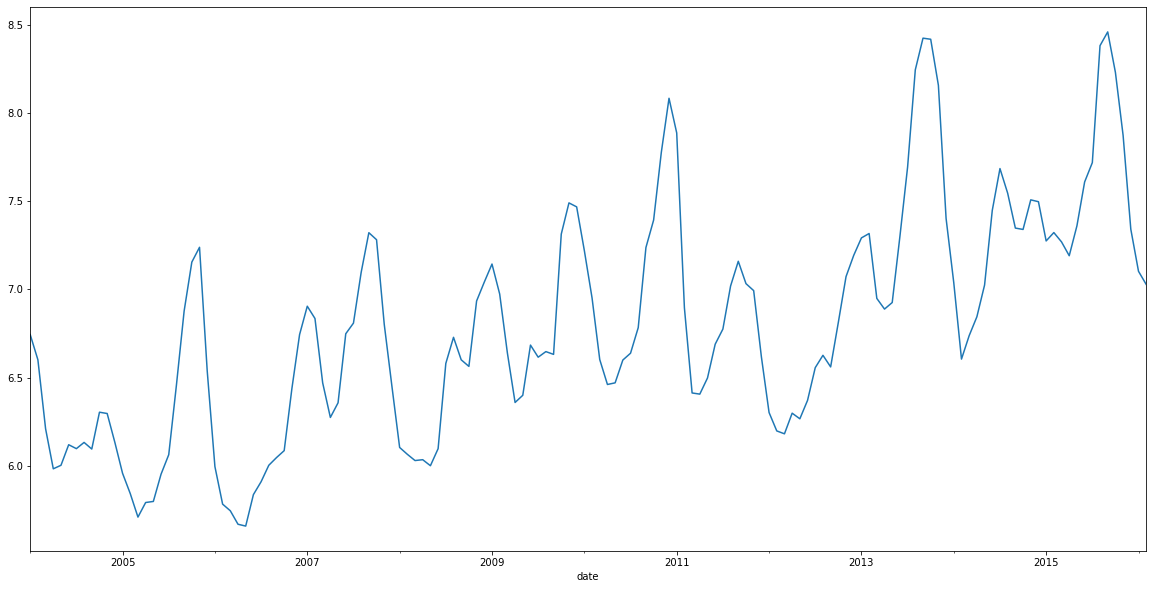

In [103]:
data1_mumbai.log_priceMod.plot()
plt.show()

In [104]:
data1_mumbai_mean = data1_mumbai.log_priceMod.mean()
data1_mumbai["mean_price"] = np.exp(data1_mumbai_mean)
data1_mumbai.head()

,quantity,priceMod,log_priceMod,mean_price
date,,,,
2004-01-01,267100,849,6.744059,889.100239
2004-02-01,239350,736,6.601230,889.100239
2004-03-01,238000,498,6.210600,889.100239
2004-04-01,198200,397,5.983936,889.100239
2004-05-01,166430,405,6.003887,889.100239


## Q2.Build time series model and check the performance of the model using RMSE

In [105]:
data1_price = pd.DataFrame(data1['priceMod'].resample('M').sum())
data1_price

,priceMod
date,
1996-01-31,226
1996-02-29,186
1996-03-31,243
1996-04-30,254
1996-05-31,269
...,...
2015-10-31,255491
2015-11-30,186994
2015-12-31,132759


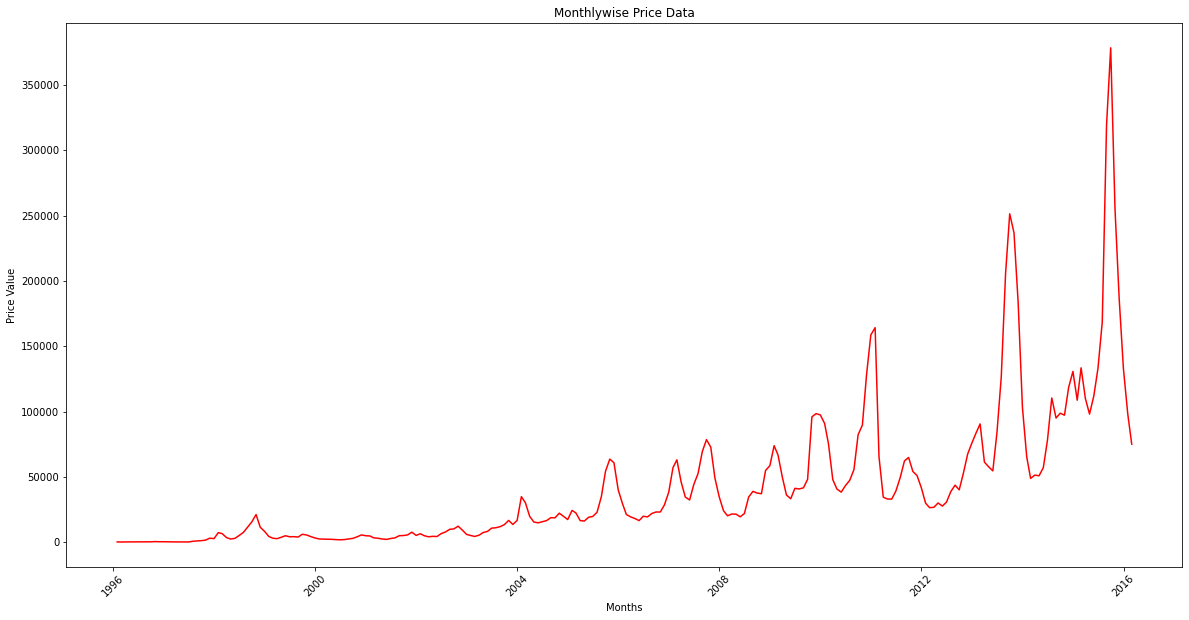

In [106]:
#Plot

plt.plot(data1_price, 'r')
plt.xticks(rotation = 45)
plt.title('Monthlywise Price Data')
plt.xlabel('Months')
plt.ylabel('Price Value')
plt.show()

<Figure size 1080x720 with 0 Axes>

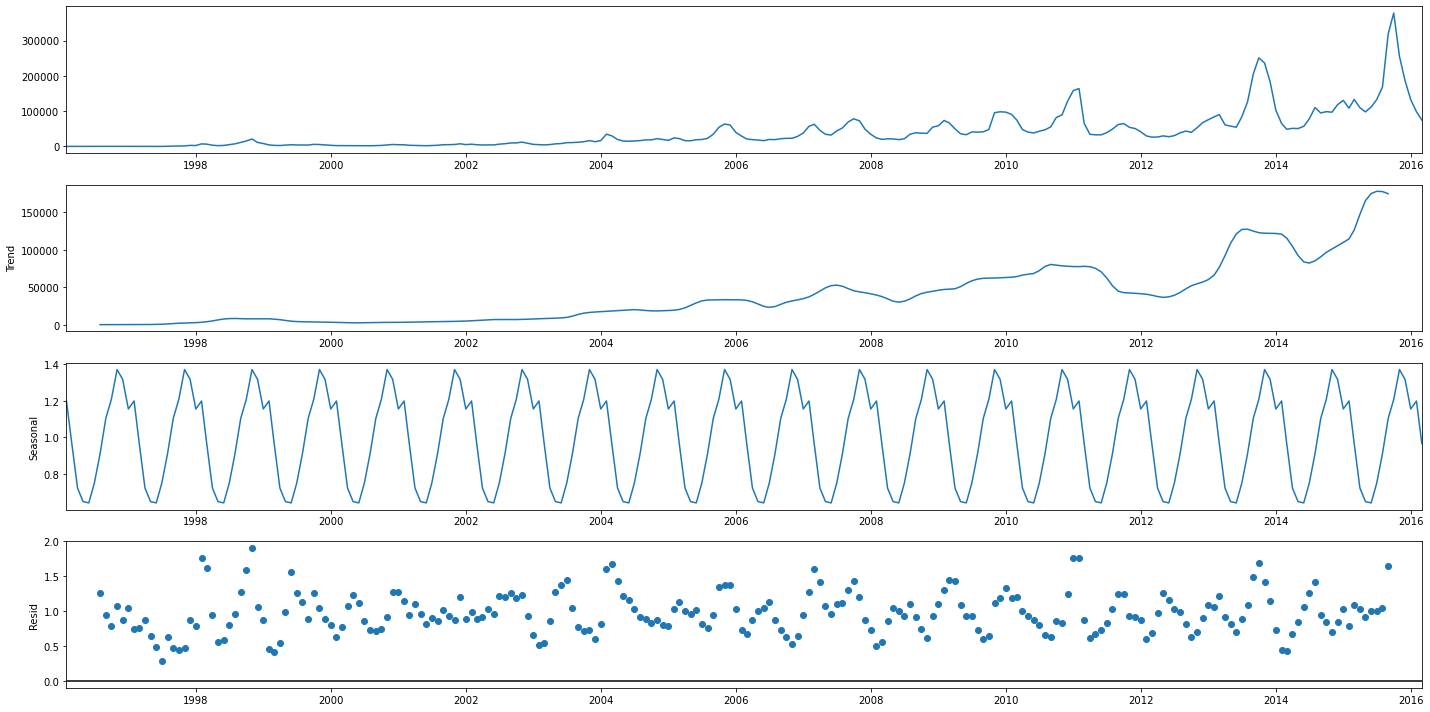

In [107]:
#Decompose with multiplicative model

plt.figure(figsize=(15,10))
from statsmodels.tsa.seasonal import seasonal_decompose
data1_price_dec_m = seasonal_decompose(data1_price, model='mul')
data1_price_dec_m.plot();
plt.show()

In [108]:
# Test for stationarity

from statsmodels.tsa.stattools import adfuller
data1_price_adf = adfuller(data1_price)

print('ADF Statistic: %f' % data1_price_adf[0])
print('p-value: %f' % data1_price_adf[1])
print('Critical Values:')
for key, value in data1_price_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.079602
p-value: 0.951433
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.574


In [109]:
! pip install pmdarima

In [110]:
from pmdarima import auto_arima

In [111]:
data1_price_aa = auto_arima(data1_price)
data1_price_aa.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2678.389
Date:                Thu, 19 May 2022   AIC                           5368.778
Time:                        14:50:06   BIC                           5389.687
Sample:                             0   HQIC                          5377.202
                                - 242                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.081      4.953      0.000       0.244       0.563
ar.L2          0.5377      0.055      9.764      0.000       0.430       0.646
ar.L3         -0.4956      0.045    -10.950      0.000      -0.584      -0.407
ma.L1          0.0730      0.053      1.389      0.165      -0.030       0.176
ma.L2         -0.8973      0.060    -14.896      0.000      -1.015      -0.779
sigma2      2.843e+08   2.93e-10   9.69e+17      0.000    2.84e+08    2.84e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              9413.19
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):             202.18   Skew:                             2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.59e+32. Standard errors may be unstable.
"""

In [112]:
data1_res = pd.DataFrame(data1_price_aa.resid(), index = data1_price.index)
data1_res.head()

,0
date,
1996-01-31,226.000000
1996-02-29,-143.139978
1996-03-31,151.468963
1996-04-30,1.400369
1996-05-31,73.150871


In [113]:
data1_price_aa_v = pd.DataFrame(data1_price_aa.predict_in_sample(), index = data1_price.index)
data1_price_aa_v.head()

,0
date,
1996-01-31,0.000000
1996-02-29,329.139978
1996-03-31,91.531037
1996-04-30,252.599631
1996-05-31,195.849129


Text(0.5, 1.0, 'Line plot of Residuals')

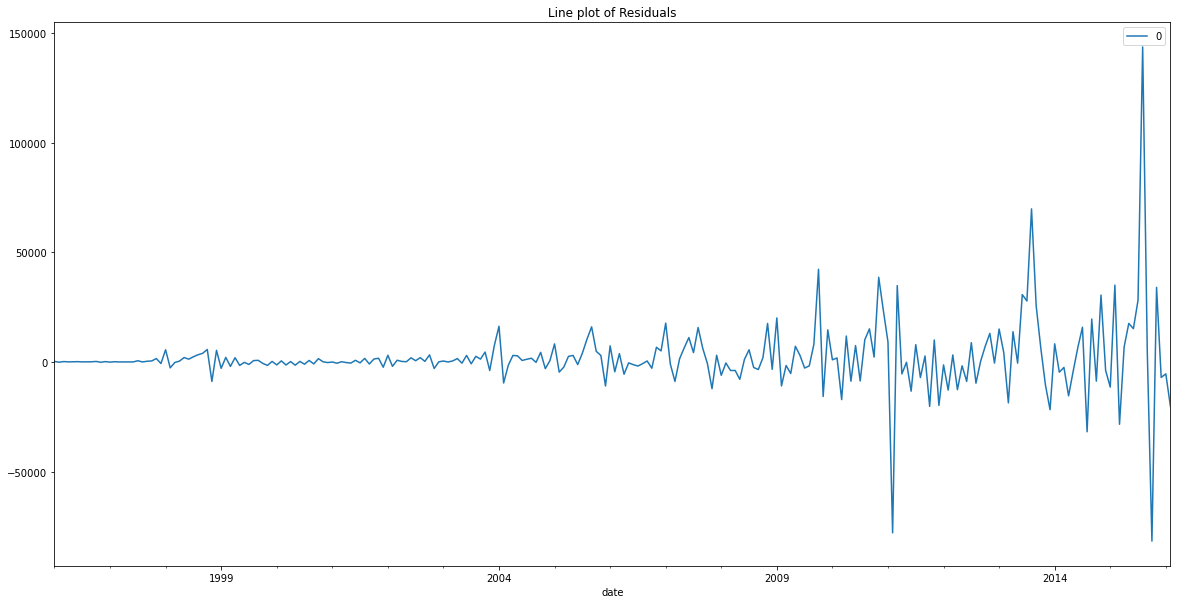

In [114]:
data1_res.plot()
plt.title('Line plot of Residuals')

Text(0.5, 1.0, 'Histogram of Residuals')

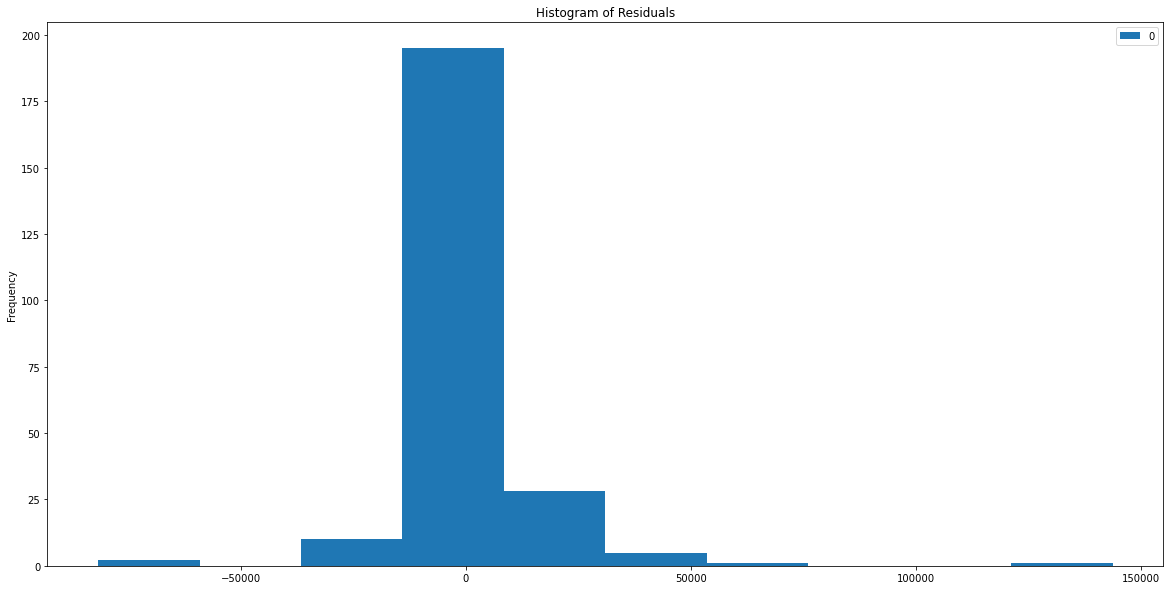

In [115]:
data1_res.plot(kind='hist')
plt.title('Histogram of Residuals')

Text(0.5, 1.0, 'Density plot of Residuals')

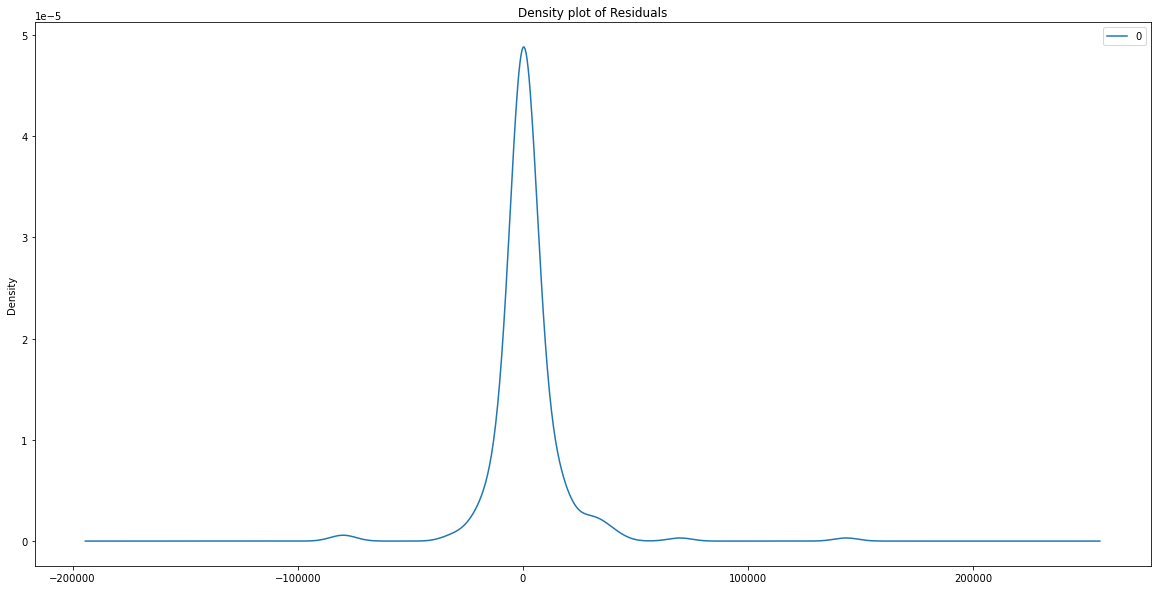

In [116]:
data1_res.plot(kind='kde')
plt.title('Density plot of Residuals')

In [117]:
data1_se = pow(data1_res,2)
data1_se.head()

,0
date,
1996-01-31,51076.000000
1996-02-29,20489.053208
1996-03-31,22942.846681
1996-04-30,1.961033
1996-05-31,5351.049997


In [118]:
from math import sqrt

data1_mse = (data1_se.sum())/len(data1_se) #Root of average/mean of squared residuals/ errors
data1_rmse = sqrt(data1_mse) 
print(data1_mse) 

0    2.593785e+08
dtype: float64


In [119]:
ss_data1_rmse = sqrt(data1_mse) 
ss_data1_rmse

16105.231396393609

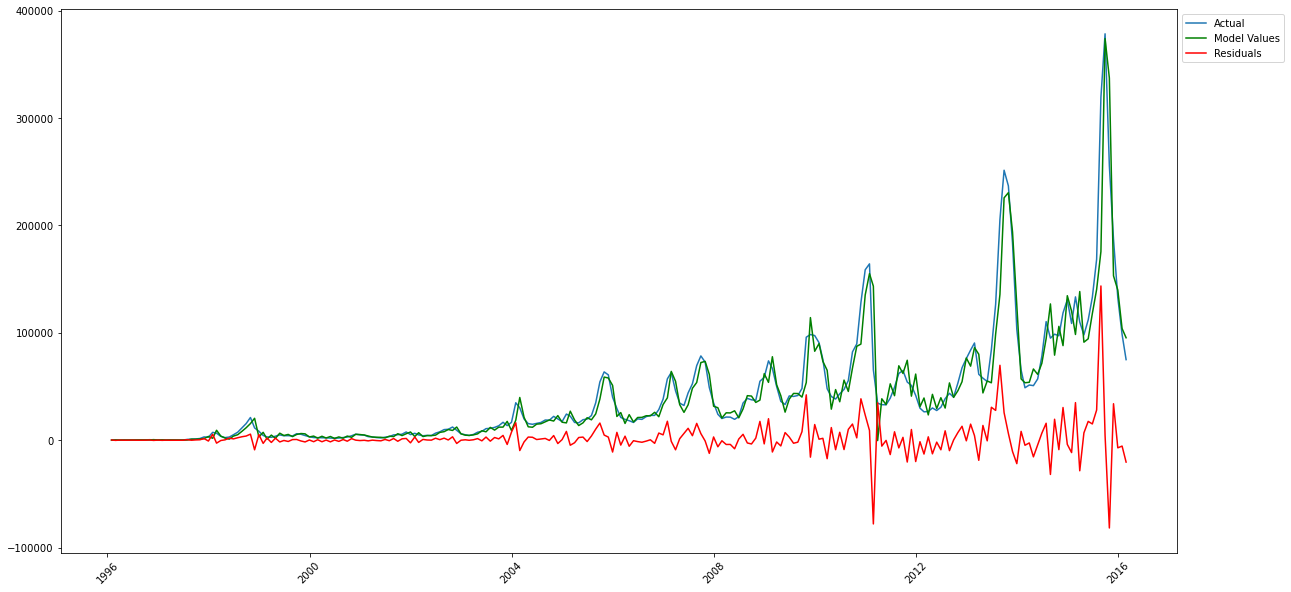

In [120]:
plt.plot(data1_price)
plt.plot(data1_price_aa_v, 'g')
plt.plot(data1_res, 'r')
plt.legend(['Actual','Model Values', 'Residuals'],
           bbox_to_anchor = (1, 1), loc = 2)
plt.xticks(rotation = 45)
plt.show()

# Q3.Plot ACF and PACF plots

In [121]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

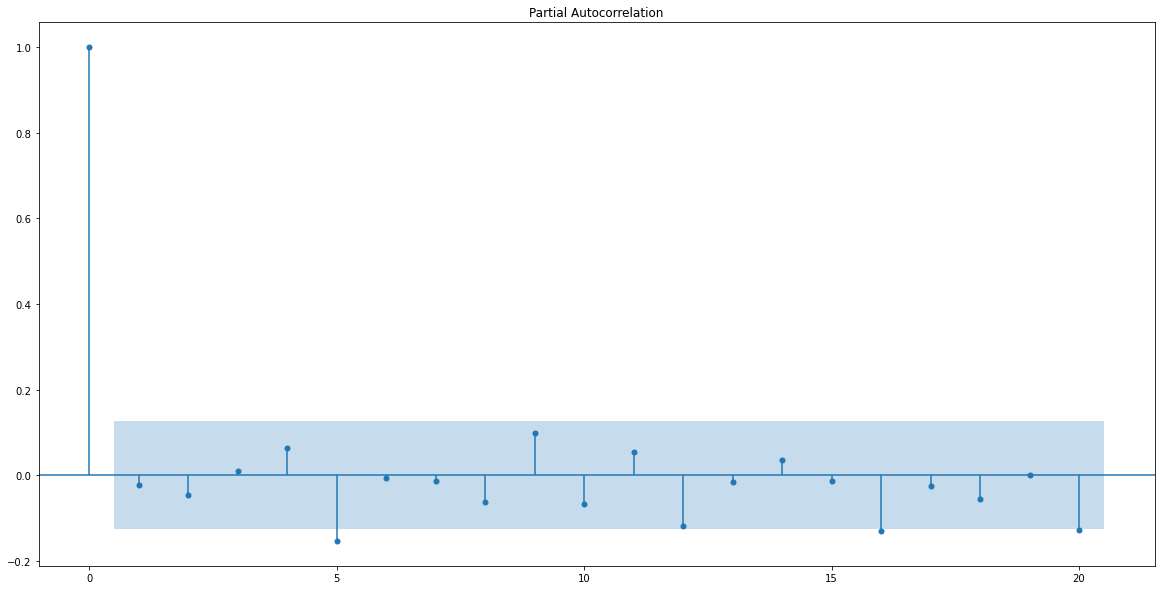

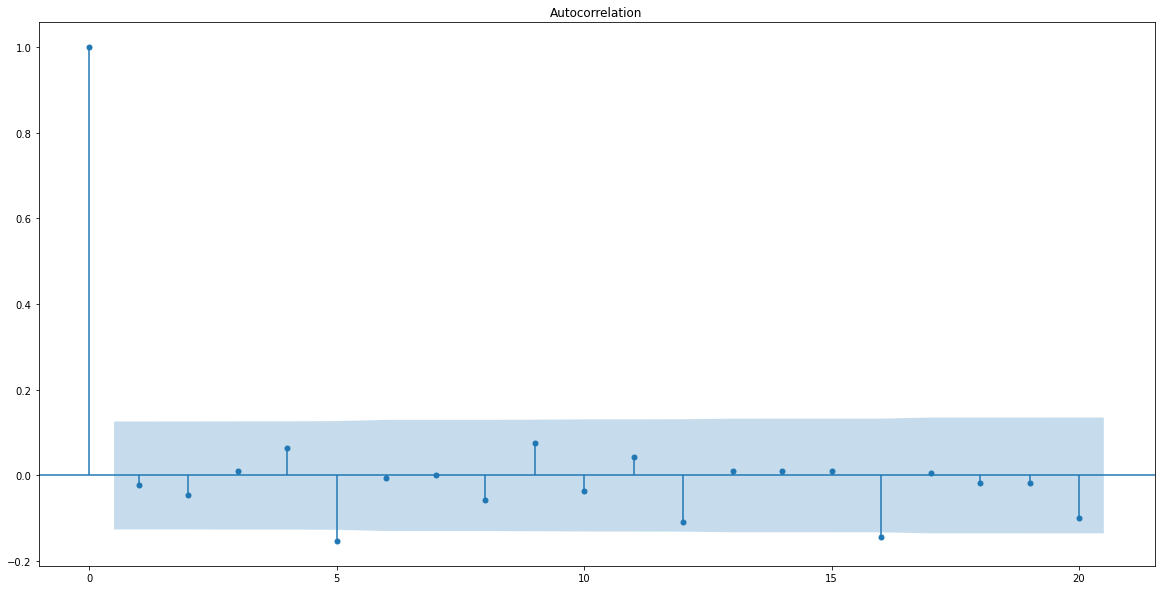

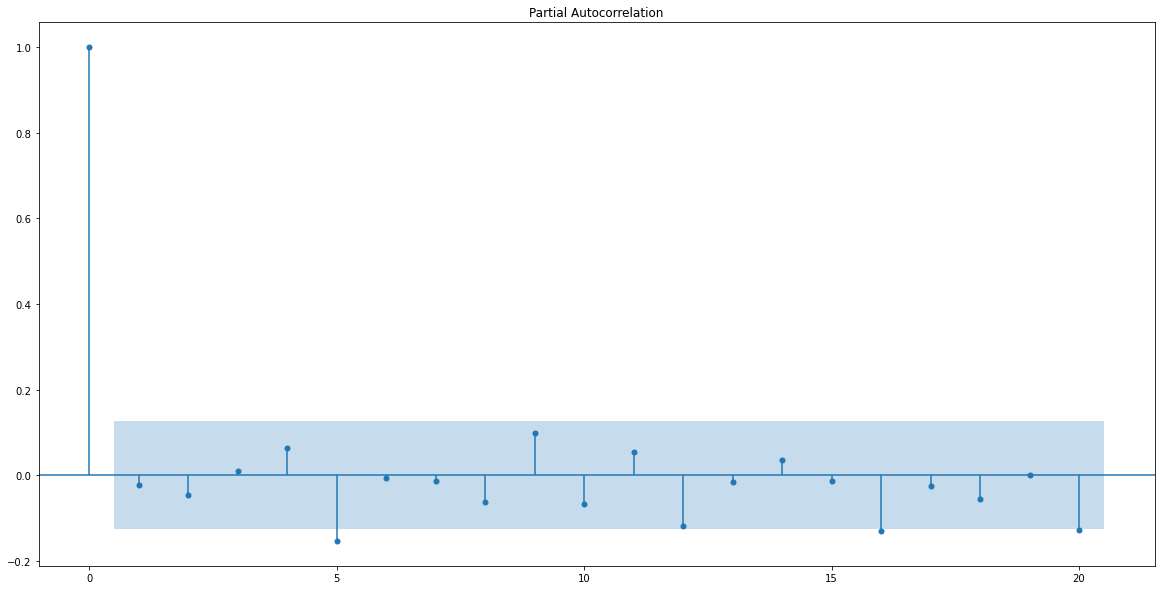

In [122]:
plot_acf(data1_res, lags=20) 
plot_pacf(data1_res, lags=20)

## Q4.Exponential smoothing using Holt-Winter’s technique and Forecast onion price for Mumbai market

In [123]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
data1_Exp_Sm = ExponentialSmoothing(data1_price, seasonal_periods = 12, trend = 'add', seasonal = 'add').fit()
data1_Exp_Sm.summary()

C:\Users\pilot\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,priceMod,No. Observations:,242
Model:,ExponentialSmoothing,SSE,104817250011.318
Optimized:,True,AIC,4844.544
Trend:,Additive,BIC,4900.367
Seasonal:,Additive,AICC,4847.612
Seasonal Periods:,12,Date:,"Thu, 19 May 2022"
Box-Cox:,False,Time:,14:50:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.0001,beta,True


In [124]:
data1_res1 = pd.DataFrame(data1_Exp_Sm.resid)
data1_res1.head()

,0
date,
1996-01-31,-55.583333
1996-02-29,-55.855719
1996-03-31,-55.851524
1996-04-30,-55.845946
1996-05-31,-55.840361


Text(0.5, 1.0, 'Line plot of Residuals')

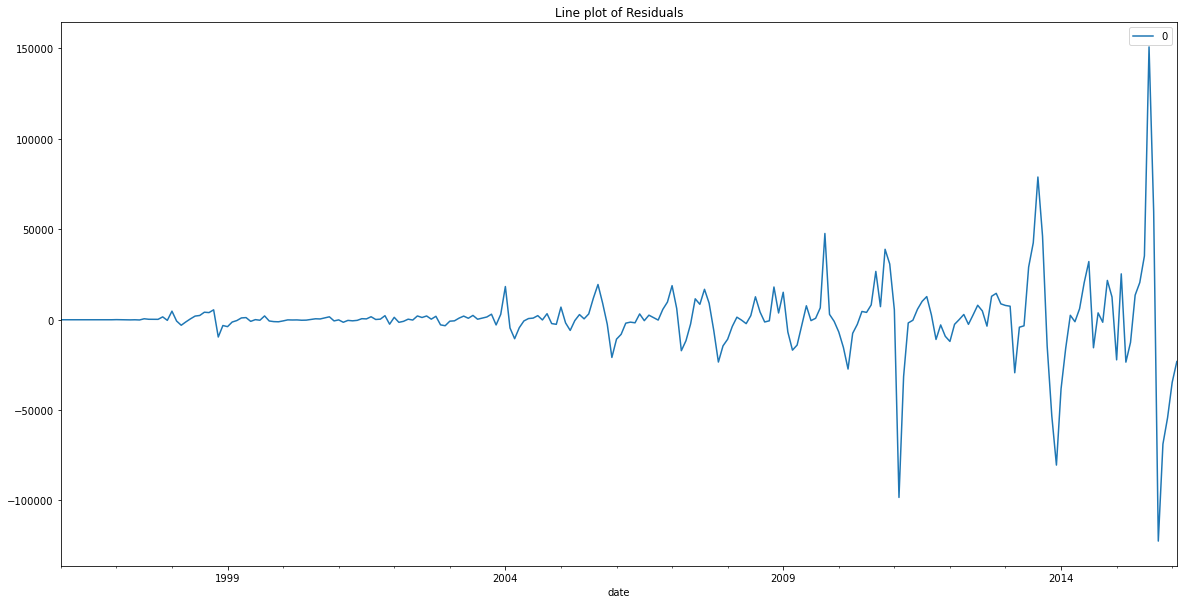

In [125]:
data1_res1.plot()
plt.title('Line plot of Residuals')

In [126]:
data1_se1 = pow(data1_res1,2)
data1_se1.head()

,0
date,
1996-01-31,3089.506944
1996-02-29,3119.861396
1996-03-31,3119.392705
1996-04-30,3118.769633
1996-05-31,3118.145914


In [127]:
data1_mse1 = (data1_se1.sum())/len(data1_se1)
print(data1_mse1)

0    4.331291e+08
dtype: float64


In [128]:
data1_rmse1 = sqrt(data1_mse1) 
data1_rmse1

20811.754666009645

In [129]:
data1_pred2 = data1_Exp_Sm.forecast(steps = 19)
data1_pred2

2016-03-31    75066.081560
2016-04-30    75683.890266
2016-05-31    76062.494396
2016-06-30    76769.874430
2016-07-31    77065.591494
2016-08-31    77731.534470
2016-09-30    77227.361741
2016-10-31    76245.343481
2016-11-30    76204.253141
2016-12-31    75958.207224
2017-01-31    76176.101164
2017-02-28    75890.363572
2017-03-31    75806.652299
2017-04-30    76424.461004
2017-05-31    76803.065134
2017-06-30    77510.445169
2017-07-31    77806.162232
2017-08-31    78472.105208
2017-09-30    77967.932479
Freq: M, dtype: float64

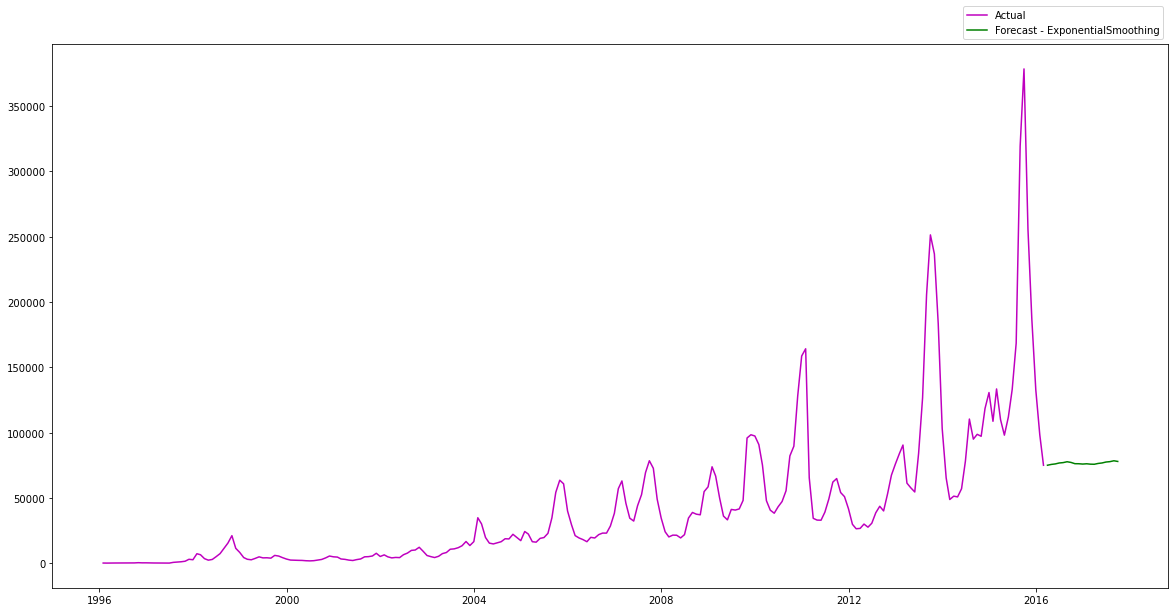

In [130]:
plt.plot(data1_price, color = 'm')
plt.plot(data1_pred2, color = 'g')
plt.legend(['Actual', 'Forecast - ExponentialSmoothing'], bbox_to_anchor = (1,1), loc = 4)
plt.show()

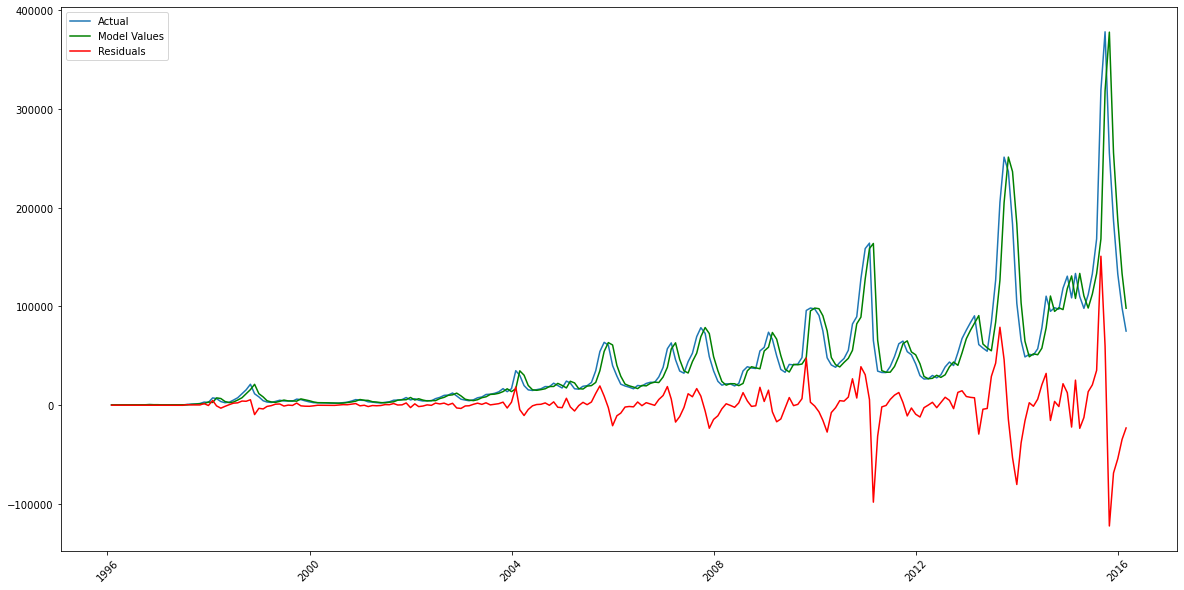

In [131]:
plt.plot(data1_price)
plt.plot(data1_Exp_Sm.fittedvalues, 'g')
plt.plot(data1_res1, 'r')
plt.legend(['Actual','Model Values', 'Residuals'])
plt.xticks(rotation=45)
plt.show()

In [132]:
from pmdarima import auto_arima

data1_price_mode = auto_arima(data1_price)
data1_price_mode.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2678.389
Date:                Thu, 19 May 2022   AIC                           5368.778
Time:                        14:50:18   BIC                           5389.687
Sample:                             0   HQIC                          5377.202
                                - 242                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.081      4.953      0.000       0.244       0.563
ar.L2          0.5377      0.055      9.764      0.000       0.430       0.646
ar.L3         -0.4956      0.045    -10.950      0.000      -0.584      -0.407
ma.L1          0.0730      0.053      1.389      0.165      -0.030       0.176
ma.L2         -0.8973      0.060    -14.896      0.000      -1.015      -0.779
sigma2      2.843e+08   2.93e-10   9.69e+17      0.000    2.84e+08    2.84e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):              9413.19
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):             202.18   Skew:                             2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.59e+32. Standard errors may be unstable.
"""

In [133]:
data1_price_mode_res = data1_price_mode.resid()
data1_price_mode_res

array([ 2.26000000e+02, -1.43139978e+02,  1.51468963e+02,  1.40036900e+00,
        7.31508715e+01,  1.07631826e+02,  7.50926029e+00,  1.24211068e+01,
        4.15987011e+01,  2.07182177e+02, -1.66849466e+02,  1.36534024e+02,
       -1.01116991e+02,  8.02958491e+01, -2.71297575e+01, -2.55671102e+01,
       -9.80510674e+00, -6.56351971e+00,  5.16364838e+02, -1.33819016e+01,
        2.85411658e+02,  4.31029893e+02,  1.53176919e+03, -7.46186085e+02,
        5.53068486e+03, -2.70812350e+03, -2.47986619e+02,  3.52078578e+02,
        1.98501688e+03,  1.24677236e+03,  2.32231469e+03,  3.25357318e+03,
        3.90076781e+03,  5.66544007e+03, -8.91983402e+03,  5.27623240e+03,
       -2.93003739e+03,  2.04766171e+03, -2.05577591e+03,  1.91751054e+03,
       -1.59945702e+03, -2.23570414e+02, -1.15158826e+03,  5.91869103e+02,
        7.10255795e+02, -6.80327276e+02, -1.59683949e+03,  2.13814380e+02,
       -1.36791953e+03,  4.54545882e+02, -1.40749547e+03,  1.55588764e+02,
       -1.49950375e+03,  

In [134]:
data1_price_mode_res1 = pd.DataFrame(data1_price_mode_res, index = data1_price.index)
data1_price_mode_res1

,0
date,
1996-01-31,226.000000
1996-02-29,-143.139978
1996-03-31,151.468963
1996-04-30,1.400369
1996-05-31,73.150871
...,...
2015-10-31,-81688.830002
2015-11-30,33976.052781
2015-12-31,-7069.306888


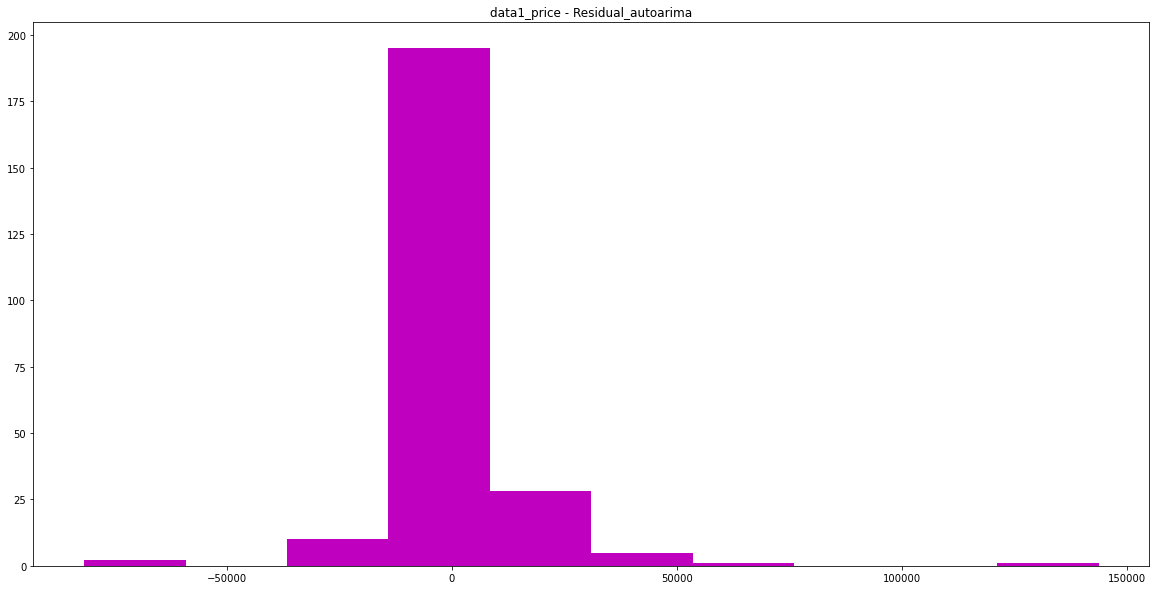

In [135]:
plt.hist(data1_price_mode_res1, color = 'm')
plt.title('data1_price - Residual_autoarima')
plt.show()

In [136]:
data1_price_mod_se = pow(data1_price_mode_res1, 2)
data1_price_mod_se.head()

,0
date,
1996-01-31,51076.000000
1996-02-29,20489.053208
1996-03-31,22942.846681
1996-04-30,1.961033
1996-05-31,5351.049997


In [137]:
data1_price_mod_mse = (data1_price_mod_se.sum()) / len(data1_price_mod_se)
data1_price_mod_mse

0    2.593785e+08
dtype: float64

In [138]:
data1_price_mod_rmse = sqrt(data1_price_mod_mse) 
data1_price_mod_rmse

16105.231396393609

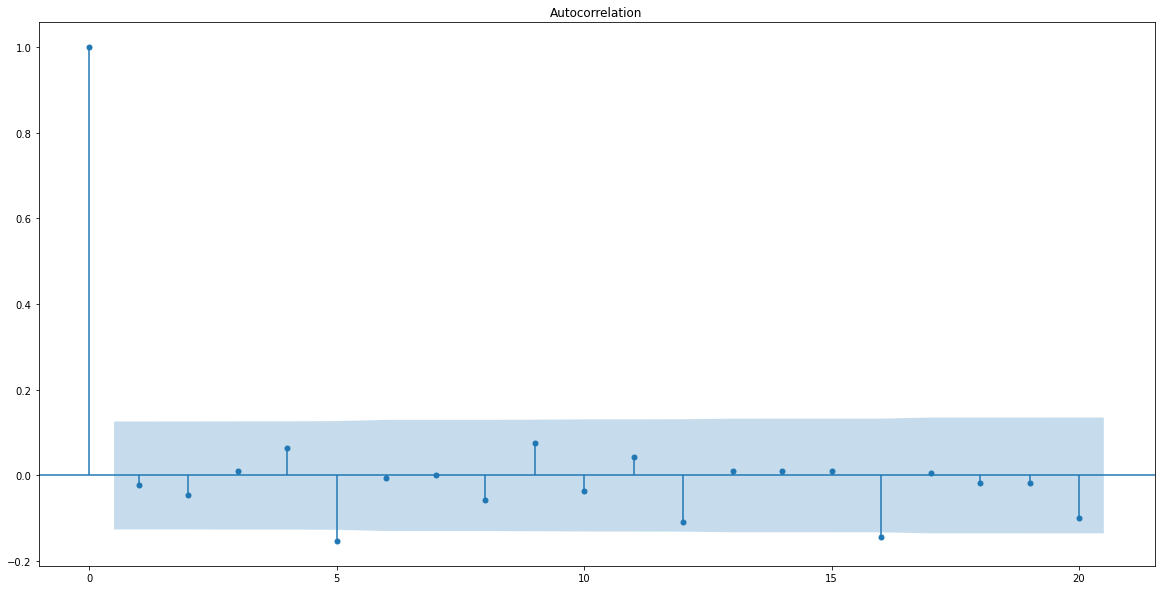

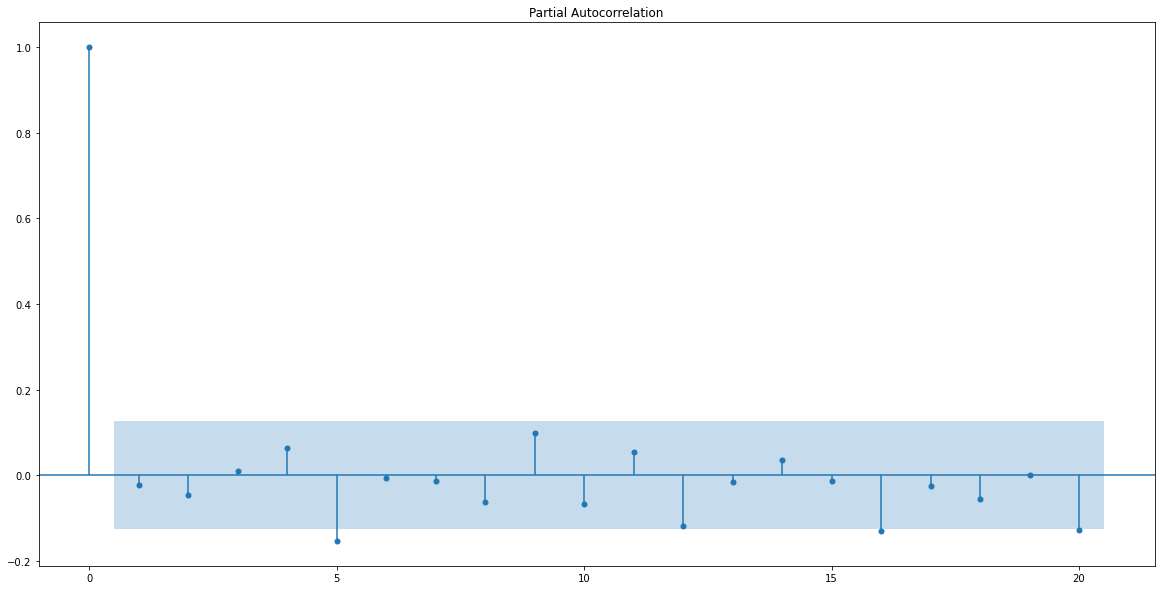

In [139]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(data1_price_mode_res, lags=20)
plot_pacf(data1_price_mode_res, lags=20);

In [140]:
data1_pred3 = data1_price_mode.predict(steps = 19)
data1_pred3

array([ 77435.37957473, 101045.95832377, 123475.17719243, 144024.63658321,
       152669.71147488, 156089.43655926, 151932.66566858, 147810.94780504,
       142219.04537642, 139808.07039473])

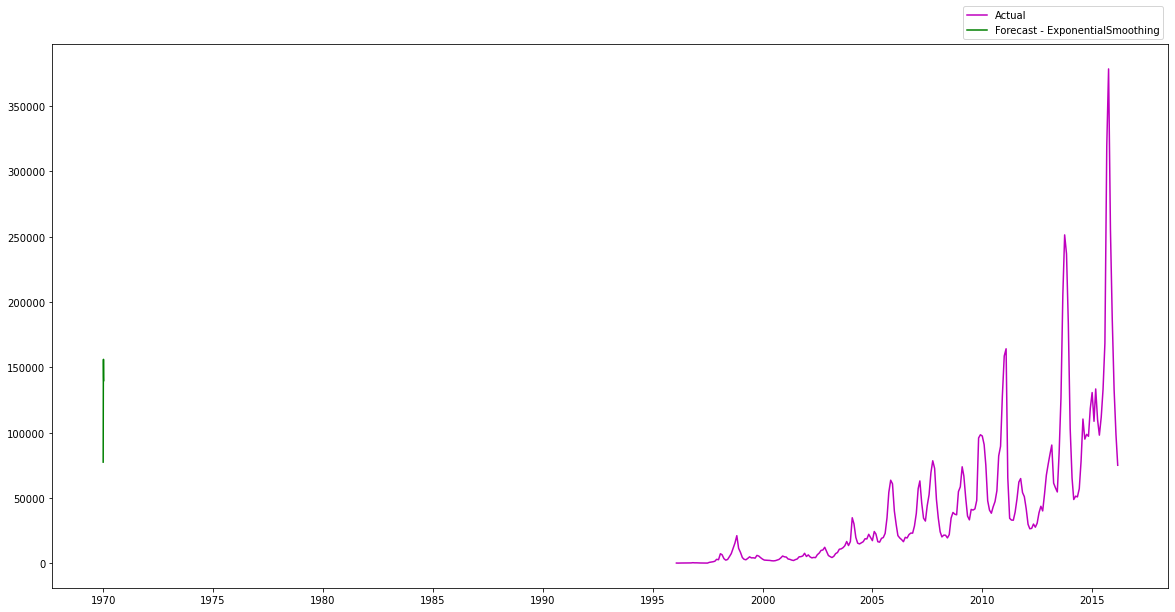

In [141]:
plt.plot(data1_price, color = 'm')
plt.plot(data1_pred3, color = 'g')
plt.legend(['Actual', 'Forecast - ExponentialSmoothing'], bbox_to_anchor = (1,1), loc = 4)
plt.show()